In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']
filepath='data_2.csv'
df=pd.read_csv(filepath)

df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 12 columns):
Unnamed: 0          36373 non-null int64
title               36373 non-null object
company_name        36373 non-null object
money               34162 non-null object
work_position       36373 non-null object
work_experience     36373 non-null object
education           36373 non-null object
number              36373 non-null object
date_time           36373 non-null object
info                36373 non-null object
company_position    34580 non-null object
url                 36373 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


Index(['Unnamed: 0', 'title', 'company_name', 'money', 'work_position',
       'work_experience', 'education', 'number', 'date_time', 'info',
       'company_position', 'url'],
      dtype='object')

In [2]:
df

,Unnamed: 0,title,company_name,money,work_position,work_experience,education,number,date_time,info,company_position,url
0,0,Python开发工程师,科沃斯商用机器人有限公司,8000-10000/月,苏州-吴中区,3-4年经验,本科,招1人,05-19发布,岗位职责：1、 参与相关业务需求分析、完成编码及功能实现2、 开发系统服务相关的接口3、 系...,苏州市吴中区友翔路18号,https://jobs.51job.com/suzhou-wzq/113631585.ht...
1,1,Python开发工程师,上海澳马信息技术服务有限公司,10000-15000/月,上海,2年经验,大专,招若干人,05-19发布,岗位职责：1.负责基于Python系统的开发、维护工作；2.负责数据的深度提取和挖掘、数据抽...,上海市杨浦区政立路421号中航天盛广场C栋901室,https://jobs.51job.com/shanghai/112471902.html...
2,2,实习生（python助教）,达内时代集团襄阳地区,6000-8000/月,武汉-洪山区,无工作经验,大专,招1人,05-19发布,岗位职责：1、教学活动：负责班级日常教学活动和管理，组织知识点串讲、月考实施与教学效果评估，...,茅店山西路8号创星汇科技园C栋4楼,https://jobs.51job.com/wuhan-hsq/113616592.htm...
3,3,Python开发工程师,苏州亿嘉宁管理咨询有限公司,20833-41666/月,上海-长宁区,3-4年经验,本科,招1人,05-19发布,1.负责基于PyQt5的桌面客户端开发. 2.从事虚拟场景转换客户端产品的设计、开发工作，相...,南京路,https://jobs.51job.com/shanghai-cnq/113616410....
4,4,JAVA/ Python讲师(上市外企+双休+五险一金）\t\t\t\t(职位编号：999),童程童美济南分公司,6000-8000/月,济南-高新区,无工作经验,本科,招3人,05-19发布,岗位职责：1.公司提供专业岗前培训，根据教案进行备课，负责上课流程管控，高质量完成授课。2....,高新区万达写字楼J1 号711室,https://jobs.51job.com/jinan-gxq/104349998.htm...
5,5,python-web 全栈工程师,杭州创慧信息技术有限公司,8000-12000/月,杭州-滨江区,无工作经验,本科,招2人,05-19发布,"负责公司 web 产品(医学图像标注, 医学影像算法产品等)快速开发、相关优化以及产品部署负...",建业路511号华业大厦,https://jobs.51job.com/hangzhou-bjq/101147442....
6,6,Python高级软件工程师,广州英荔教育科技有限公司,15000-25000/月,广州-天河区,3-4年经验,本科,招2人,05-19发布,1. 基于edX开源项目，使用Python语言，Django框架开发功能；2. 在线教育网站...,中信广场,https://jobs.51job.com/guangzhou-thq/89142700....
7,7,Python后端应用开发工程师/助理(Linux环境),皕得智能科技（武汉）有限公司,4000-10000/月,武汉-洪山区,2年经验,招若干人,05-19发布,05-19发布,工作内容：1、1-2年或以上在Linux下集成和开发python应用；2、熟悉常用网络通信协...,光谷,https://jobs.51job.com/wuhan-hsq/94769168.html...
8,8,Python实习（双休）,陕西祥硕建筑工程有限公司,3000-4500/月,贵阳,无工作经验,大专,招4人,05-19发布,岗位职责：1、协助研发工程师负责公司业务媒介及广告主数据对接和接口联调技术支撑；2、协助研发...,观山湖区林城西路,https://jobs.51job.com/guiyang/112798217.html?...
9,9,python开发工程师,广州战神同盟网络科技有限公司,15000-25000/月,广州-天河区,3-4年经验,大专,招2人,计算机科学与技术,1、负责管理后台的开发，参与项目的编程、调试和模块测试工作；2、根据项目需求，能够独立按时完...,科韵路信息港,https://jobs.51job.com/guangzhou-thq/113258660...


In [3]:
df=df.sort_index()

In [4]:
df['money']=df['money'].astype(str)

In [5]:
df[['work_position','money']].head()

,work_position,money
0,苏州-吴中区,8000-10000/月
1,上海,10000-15000/月
2,武汉-洪山区,6000-8000/月
3,上海-长宁区,20833-41666/月
4,济南-高新区,6000-8000/月


In [7]:
import re
df['bottom'] = df['money']
df['top'] = df['money']
df['average'] = df['money']
pattern = re.compile('([0-9]+)')
q1=q2=q3=q4=0
for i in range(len(df['money'])):
    item = df['money'].loc[i].strip()
    result = re.findall(pattern, item)
    try:
        if result:
            try:
            #此语句执行成功则表示result[0],result[1]都存在，即职位月薪形如‘6000-9000元/月’
                df['bottom'].loc[i] = result[0]
                df['top'].loc[i] = result[1]
                df['average'].loc[i] = str((int(result[0])+int(result[1]))/2)
                q1+=1
            except:
            #此语句执行成功则表示result[0]存在，result[1]不存在，职位月薪形如‘10000元/月’
                df['bottom'].loc[i] = result[0]
                df['top'].loc[i] = result[0]
                df['average'].loc[i] = str((int(result[0])+int(result[0]))/2)
                q2+=1
        else:
        #此语句执行成功则表示【职位月薪】中并无数字形式存在，可能是‘面议’、‘found no element’
            df['bottom'].loc[i] = item
            df['top'].loc[i] = item
            df['average'].loc[i] = item
            q3+=1
    except Exception as e:
        q4+=1
        print(q4,item,repr(e))
for i in range(100):#测试一下看看职位月薪和bottom、top是否对的上号
    print(df[['money','bottom','top','average']].loc[i])#或者df[['职位月薪','bottom','top','average']].iloc[i]也可
df[['money','bottom','top','average']].head(10)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


money      8000-10000/月
bottom             8000
top               10000
average          9000.0
Name: 0, dtype: object
money      10000-15000/月
bottom             10000
top                15000
average          12500.0
Name: 1, dtype: object
money      6000-8000/月
bottom            6000
top               8000
average         7000.0
Name: 2, dtype: object
money      20833-41666/月
bottom             20833
top                41666
average          31249.5
Name: 3, dtype: object
money      6000-8000/月
bottom            6000
top               8000
average         7000.0
Name: 4, dtype: object
money      8000-12000/月
bottom             8000
top               12000
average         10000.0
Name: 5, dtype: object
money      15000-25000/月
bottom             15000
top                25000
average          20000.0
Name: 6, dtype: object
money      4000-10000/月
bottom             4000
top               10000
average          7000.0
Name: 7, dtype: object
money      3000-4500/月
bottom            300

Name: 67, dtype: object
money      6000-10000/月
bottom             6000
top               10000
average          8000.0
Name: 68, dtype: object
money      8000-15000/月
bottom             8000
top               15000
average         11500.0
Name: 69, dtype: object
money      6000-12000/月
bottom             6000
top               12000
average          9000.0
Name: 70, dtype: object
money      10000-17000/月
bottom             10000
top                17000
average          13500.0
Name: 71, dtype: object
money      9000-15000/月
bottom             9000
top               15000
average         12000.0
Name: 72, dtype: object
money      7000-11000/月
bottom             7000
top               11000
average          9000.0
Name: 73, dtype: object
money      10000-15000/月
bottom             10000
top                15000
average          12500.0
Name: 74, dtype: object
money      5000-10000/月
bottom             5000
top               10000
average          7500.0
Name: 75, dtype: object
money   

,money,bottom,top,average
0,8000-10000/月,8000,10000,9000.0
1,10000-15000/月,10000,15000,12500.0
2,6000-8000/月,6000,8000,7000.0
3,20833-41666/月,20833,41666,31249.5
4,6000-8000/月,6000,8000,7000.0
5,8000-12000/月,8000,12000,10000.0
6,15000-25000/月,15000,25000,20000.0
7,4000-10000/月,4000,10000,7000.0
8,3000-4500/月,3000,4500,3750.0
9,15000-25000/月,15000,25000,20000.0


In [8]:
df['work_city'] = df['work_position']
pattern2 = re.compile('(.*?)(\-)')
df_city = df['work_position'].copy()
for i in range(len(df_city)):
    item = df_city.iloc[i].strip()
    result = re.search(pattern2,item)
    if result:
        print(result.group(1).strip())
        df_city.iloc[i] = result.group(1).strip()
    else:
        print(item.strip())
        df_city.iloc[i] = item.strip()
df['work_city'] = df_city
df[['work_position','work_city']].head(20)

苏州
上海
武汉
上海
济南
杭州
广州
武汉
贵阳
广州
深圳
西安
深圳
广州
西安
深圳
长沙
重庆
珠海
石家庄
武汉
武汉
深圳
上海
成都
苏州
沈阳
西安
上海
上海
深圳
厦门
上海
上海
郑州
济南
北京
苏州
成都
上海
深圳
上海
杭州
苏州
广州
深圳
杭州
上海
金华
上海
深圳
广州
上海
苏州
杭州
上海
上海
西安
北京
南京
上海
厦门
武汉
福州
上海
广州
广州
北京
深圳
深圳
广州
上海
广州
苏州
上海
武汉
上海
上海
武汉
杭州
珠海
郑州
深圳
福州
大连
北京
重庆
成都
天津
苏州
南京
深圳
常州
南京
东莞
武汉
南京
上海
上海
上海
深圳
南通
北京
重庆
北京
广州
上海
邵阳
上海
厦门
福州
深圳
广州
杭州
杭州
杭州
广州
贵阳
合肥
长沙
上海
广州
无锡
上海
上海
深圳
厦门
武汉
西安
青岛
郑州
兰州
邯郸
深圳
深圳
深圳
青岛
南京
青岛
大连
广州
广州
上海
南京
上海
上海
上海
深圳
南通
北京
重庆
北京
广州
上海
邵阳
上海
厦门
福州
深圳
广州
杭州
杭州
杭州
广州
贵阳
合肥
长沙
上海
广州
无锡
上海
上海
深圳
厦门
武汉
西安
青岛
郑州
兰州
邯郸
深圳
深圳
深圳
青岛
南京
青岛
大连
广州
广州
上海
南京
上海
上海
上海
深圳
南通
北京
重庆
北京
广州
上海
邵阳
上海
厦门
福州
深圳
广州
杭州
杭州
杭州
广州
贵阳
合肥
长沙
上海
广州
无锡
上海
上海
深圳
厦门
武汉
西安
青岛
郑州
兰州
邯郸
深圳
深圳
深圳
青岛
南京
青岛
大连
广州
广州
上海
南京
上海
上海
上海
深圳
南通
北京
重庆
北京
广州
上海
邵阳
上海
厦门
福州
深圳
广州
杭州
杭州
杭州
广州
贵阳
合肥
长沙
上海
广州
无锡
上海
上海
深圳
厦门
武汉
西安
青岛
郑州
兰州
邯郸
深圳
深圳
深圳
青岛
南京
青岛
大连
广州
广州
上海
北京
福州
南京
上海
杭州
深圳
深圳
深圳
深圳
北京
北京
深圳
南京
北京
成都
成都
南京
长沙
北京
南京
重庆
武汉
上海
深圳
深圳
昆山
上海
杭州
杭州
广州
合肥
北京
上海
武汉
重庆
武汉
武汉
深圳
昆山
上海
上海
上海
武汉
北京
上海
南昌
太仓
广州
深圳


上海
上海
深圳
成都
上海
深圳
上海
北京
深圳
杭州
上海
江门
深圳
西安
上海
成都
北京
杭州
杭州
深圳
上海
上海
广州
广州
上海
上海
上海
上海
北京
广州
武汉
广州
上海
深圳
上海
上海
北京
杭州
杭州
广州
南京
东莞
北京
北京
上海
北京
广州
广州
深圳
深圳
上海
武汉
杭州
上海
广州
重庆
成都
广州
广州
深圳
武汉
上海
深圳
上海
深圳
上海
上海
北京
深圳
上海
杭州
深圳
深圳
深圳
武汉
上海
北京
广州
北京
深圳
上海
深圳
北京
北京
广州
上海
上海
上海
宁波
广州
杭州
北京
深圳
上海
上海
杭州
广州
武汉
上海
上海
上海
厦门
深圳
成都
上海
福州
深圳
广州
广州
南通
杭州
苏州
北京
福州
广州
南京
昆明
上海
武汉
武汉
南京
成都
合肥
肇庆
武汉
福州
广州
杭州
杭州
重庆
深圳
上海
上海
广东省
上海
广州
广州
广州
苏州
北京
上海
上海
广州
南京
呼和浩特
深圳
上海
苏州
广州
南京
广州
成都
深圳
苏州
珠海
长沙
广州
昆明
广州
广州
苏州
广州
惠州
上海
上海
杭州
上海
北京
广州
上海
深圳
广州
合肥
深圳
广州
苏州
长春
上海
上海
深圳
广州
深圳
西安
沈阳
嘉兴
杭州
广州
东莞
广州
广州
苏州
深圳
杭州
南京
深圳
无锡
上海
佛山
上海
郑州
东莞
南京
合肥
苏州
广州
青岛
上海
合肥
成都
青岛
上海
武汉
北京
上海
深圳
深圳
北京
杭州
成都
湖州
杭州
重庆
广州
杭州
深圳
深圳
合肥
上海
上海
广州
广州
深圳
合肥
上海
上海
深圳
广州
广州
广州
广州
苏州
上海
合肥
深圳
珠海
杭州
德阳
青岛
广州
南京
深圳
天津
上海
佛山
广州
杭州
南京
上海
常熟
苏州
深圳
郑州
深圳
广州
深圳
郑州
北京
成都
北京
上海
武汉
广州
成都
昆明
东莞
合肥
浙江省
广州
合肥
太原
苏州
深圳
广州
广州
上海
上海
上海
长沙
广州
广州
无锡
武汉
深圳
成都
珠海
深圳
广州
佛山
上海
东莞
武汉
长沙
泉州
南京
南京
深圳
深圳
唐山
武汉
上海
广州
广州
重庆
广州
武汉
钦州
广州
温州
昆山
武汉
深圳
广州
无锡
上海
苏州
成都
广州
上海
佛山
上海
成都
苏州


苏州
深圳
杭州
上海
深圳
广州
重庆
深圳
北京
无锡
大连
济南
北京
上海
上海
深圳
上海
上海
深圳
佛山
成都
宁波
北京
成都
长沙
佛山
深圳
上海
深圳
深圳
杭州
厦门
北京
南京
大连
深圳
广州
广州
成都
武汉
上海
苏州
广州
汕头
呼和浩特
广州
武汉
北京
佛山
重庆
北京
深圳
广州
武汉
广州
上海
福州
杭州
成都
北京
北京
南京
深圳
成都
上海
成都
南京
武汉
宁波
南京
西安
上海
上海
上海
上海
武汉
重庆
深圳
深圳
北京
上海
昆明
深圳
郑州
西安
杭州
珠海
东莞
西安
长沙
上海
上海
北京
杭州
上海
上海
广州
广州
杭州
深圳
成都
深圳
深圳
上海
上海
上海
宁波
温州
武汉
广州
杭州
南通
北京
北京
南京
深圳
杭州
杭州
南昌
上海
深圳
上海
北京
上海
长沙
深圳
西安
成都
武汉
上海
深圳
广州
北京
西安
上海
北京
深圳
广州
苏州
深圳
惠州
杭州
东莞
义乌
深圳
上海
广州
南昌
杭州
杭州
北京
上海
广州
北京
广州
上海
广州
上海
武汉
上海
杭州
广州
北京
上海
上海
北京
广州
无锡
武汉
上海
深圳
上海
广州
北京
广州
昆明
武汉
上海
成都
西安
广州
武汉
贵阳
南京
深圳
杭州
上海
南昌
杭州
武汉
上海
北京
上海
上海
无锡
重庆
杭州
武汉
深圳
上海
上海
上海
天津
南京
南京
上海
广州
武汉
深圳
南京
深圳
柳州
深圳
昆山
上海
广州
合肥
重庆
深圳
北京
深圳
杭州
珠海
深圳
广州
上海
合肥
深圳
武汉
南京
武汉
福州
杭州
广州
无锡
广州
深圳
宁波
杭州
南京
杭州
北京
昆山
北京
广州
昆明
深圳
珠海
珠海
昆明
上海
广州
昆明
杭州
南京
成都
深圳
杭州
宁波
无锡
广州
南宁
合肥
上海
成都
深圳
深圳
北京
上海
武汉
中山
广州
苏州
上海
深圳
苏州
武汉
深圳
广州
长沙
广州
北京
广州
北京
上海
上海
长沙
珠海
杭州
深圳
南宁
合肥
上海
北京
福州
深圳
成都
上海
上海
佛山
昆明
北京
广州
深圳
上海
苏州
北京
苏州
南京
株洲
宁波
杭州
北京
深圳
上海
深圳
上海
上海
长沙
深圳
南京
广州
北京
佛山
上海
武汉
上海
北京
南京
广州
北京
无锡
上海

济南
上海
杭州
杭州
广州
深圳
杭州
深圳
北京
上海
温州
广州
上海
厦门
武汉
上海
成都
南京
上海
广州
杭州
深圳
深圳
苏州
上海
厦门
杭州
北京
苏州
深圳
淄博
广州
上海
上海
广州
长春
大连
长春
福州
成都
上海
常州
重庆
北京
宁波
成都
西安
成都
常州
南京
珠海
珠海
上海
广州
杭州
天津
上海
武汉
厦门
上海
广州
深圳
哈尔滨
成都
杭州
上海
上海
广州
深圳
南京
武汉
北京
合肥
深圳
成都
重庆
上海
南京
成都
上海
广州
上海
北京
上海
苏州
杭州
广州
深圳
上海
北京
杭州
杭州
南京
上海
广州
上海
广州
长沙
广州
深圳
深圳
上海
南京
佛山
宁波
武汉
上海
广州
杭州
武汉
上海
杭州
上海
上海
杭州
郑州
深圳
重庆
长沙
北京
广州
南京
南京
北京
北京
上海
深圳
上海
广州
杭州
杭州
上海
深圳
北京
广州
杭州
广州
上海
德州
北京
南京
广州
南京
上海
上海
杭州
北京
北京
广州
上海
上海
北京
广州
合肥
西安
广州
郑州
深圳
上海
上海
北京
上海
江门
深圳
厦门
北京
深圳
珠海
广州
深圳
杭州
常州
上海
深圳
武汉
深圳
广州
上海
六安
合肥
武汉
杭州
上海
广州
深圳
北京
上饶
广州
宁波
西安
重庆
北京
杭州
成都
长沙
武汉
广州
长沙
杭州
武汉
上海
上海
呼和浩特
北京
成都
广州
北京
武汉
深圳
成都
苏州
重庆
武汉
北京
杭州
广州
杭州
广州
北京
深圳
上海
上海
杭州
郑州
北京
北京
苏州
上海
苏州
上海
上海
上海
广州
深圳
中山
深圳
北京
南京
深圳
上海
苏州
上海
苏州
深圳
北京
成都
深圳
无锡
福州
东莞
天津
迪庆
广州
广州
上海
广州
成都
广州
上海
台州
深圳
黄石
上海
日照
北京
南京
北京
福州
武汉
连云港
东莞
深圳
上海
成都
苏州
杭州
西安
上海
北京
南京
北京
成都
长沙
宁波
北京
上海
北京
深圳
武汉
上海
上海
武汉
成都
广州
上海
成都
长沙
杭州
广州
上海
北京
深圳
郑州
广州
杭州
北京
深圳
南京
长沙
无锡
武汉
南昌
杭州
成都
深圳
福州
杭州
东莞
北京
西安
南京
沈阳
苏州
南京
上海
成都
长沙
西安
珠海
杭州
广州
北京


南京
深圳
拉萨
上海
宁波
成都
北京
太原
深圳
深圳
上海
北京
上海
昆明
合肥
重庆
苏州
广州
西安
南宁
成都
南宁
深圳
北京
上海
深圳
广州
上海
上海
上海
深圳
乐山
上海
杭州
长春
深圳
铜陵
上海
北京
上海
福州
深圳
广州
深圳
深圳
深圳
沈阳
重庆
重庆
北京
北京
合肥
杭州
杭州
沈阳
武汉
沈阳
北京
杭州
三门峡
上海
深圳
大连
广州
苏州
杭州
深圳
上海
北京
上海
上海
北京
北京
长沙
上海
广州
广州
西安
哈尔滨
上海
北京
大连
南京
成都
南京
北京
上海
苏州
杭州
成都
上海
上海
广州
石家庄
成都
南京
厦门
无锡
上海
杭州
深圳
深圳
北京
上海
苏州
深圳
杭州
苏州
长沙
上海
深圳
兰州
深圳
深圳
成都
深圳
广州
昆明
深圳
深圳
上海
上海
深圳
上海
福州
上海
深圳
上海
合肥
杭州
北京
北京
大连
佛山
上海
北京
北京
广州
上海
成都
襄阳
无锡
广州
深圳
成都
南京
合肥
北海
上海
上海
南昌
福州
天津
深圳
昆明
南京
深圳
深圳
北京
深圳
重庆
广州
广州
上海
成都
上海
成都
苏州
广州
上海
重庆
成都
广州
上海
武汉
长春
深圳
长沙
深圳
杭州
厦门
天津
北京
宁波
成都
成都
苏州
上海
重庆
深圳
上海
上海
广州
深圳
南京
北京
上海
上海
广州
深圳
南京
深圳
北京
深圳
北京
深圳
北京
上海
上海
北京
郑州
上海
深圳
珠海
南京
福州
东莞
福州
宁波
杭州
成都
上海
北京
上海
杭州
成都
西安
深圳
北京
深圳
重庆
深圳
上海
成都
成都
昆明
深圳
深圳
重庆
郑州
上海
常州
芜湖
深圳
武汉
北京
大连
杭州
深圳
深圳
西安
上海
南京
深圳
上海
南京
北京
成都
上海
杭州
广州
上海
上海
上海
北京
广州
深圳
惠州
深圳
北京
深圳
北京
杭州
杭州
上海
重庆
深圳
上海
成都
沈阳
上海
上海
上海
深圳
上海
上海
杭州
深圳
济南
上海
上海
南京
无锡
深圳
长沙
广州
成都
深圳
沈阳
无锡
成都
上海
上海
珠海
上海
上海
广州
上海
杭州
杭州
上海
武汉
襄阳
北京
上海
杭州
上海
深圳
杭州
天津
深圳
广州
北京
上海
珠海
广州
河南省
无锡
杭州
上海
长沙
上海


深圳
北京
北京
合肥
合肥
合肥
合肥
合肥
合肥
北京
上海
上海
北京
北京
北京
上海
北京
北京
长沙
北京
北京
北京
北京
北京
北京
北京
深圳
北京
深圳
深圳
深圳
深圳
北京
北京
北京
深圳
南京
长沙
上海
长沙
长沙
上海
长沙
上海
上海
北京
北京
郑州
北京
北京
北京
北京
北京
北京
北京
深圳
深圳
北京
深圳
北京
北京
北京
北京
北京
北京
北京
深圳
上海
南京
北京
北京
北京
北京
北京
北京
北京
北京
上海
上海
上海
上海
杭州
北京
北京
北京
北京
杭州
北京
杭州
深圳
深圳
深圳
北京
北京
北京
北京
北京
北京
深圳
北京
深圳
北京
深圳
北京
北京
北京
北京
上海
深圳
北京
北京
北京
深圳
北京
深圳
深圳
武汉
武汉
武汉
北京
北京
北京
北京
武汉
北京
上海
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
上海
深圳
深圳
北京
深圳
北京
北京
合肥
武汉
北京
北京
北京
深圳
上海
北京
北京
北京
北京
武汉
北京
深圳
北京
上海
深圳
北京
北京
北京
北京
上海
北京
北京
深圳
深圳
深圳
北京
北京
北京
北京
北京
北京
北京
上海
上海
北京
北京
北京
北京
北京
深圳
北京
北京
北京
北京
武汉
北京
北京
北京
广州
北京
深圳
上海
北京
深圳
北京
北京
北京
北京
北京
北京
北京
北京
北京
上海
北京
北京
北京
北京
北京
深圳
深圳
北京
北京
北京
上海
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
上海
北京
北京
北京
北京
上海
上海
上海
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
杭州
北京
北京
北京
北京
北京
北京
北京
北京
上海
北京
成都
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
大连
大连
上海
成都
无锡
嘉兴
嘉兴
深圳
苏州
武汉
苏

大连
大连
苏州
大连
苏州
苏州
南京
深圳
广州
成都
深圳
上海
上海
上海
上海
重庆
上海
西安
西安
西安
南京
上海
上海
南京
南京
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
北京
北京
北京
北京
深圳
南京
南京
长沙
广州
广州
深圳
上海
南京
深圳
宜昌
苏州
苏州
深圳
宜昌
宜昌
广州
广州
广州
广州
珠海
广州
珠海
珠海
珠海
珠海
上海
上海
上海
上海
北京
北京
北京
北京
北京
珠海
重庆
东莞
上海
武汉
武汉
东莞
东莞
东莞
东莞
东莞
深圳
深圳
武汉
杭州
武汉
南京
深圳
广州
北京
上海
青岛
广州
广州
深圳
青岛
深圳
深圳
深圳
深圳
深圳
青岛
中山
深圳
杭州
杭州
上海
苏州
东莞
东莞
东莞
东莞
东莞
杭州
成都
成都
杭州
广州
广州
南京
广州
广州
南京
南京
南京
南京
唐山
深圳
东莞
东莞
东莞
东莞
东莞
深圳
福州
武汉
深圳
深圳
南京
洛阳
深圳
洛阳
洛阳
深圳
天津
上海
上海
上海
上海
广州
广州
上海
苏州
武汉
杭州
杭州
上海
重庆
上海
上海
上海
石家庄
石家庄
石家庄
石家庄
郑州
深圳
郑州
杭州
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
深圳
上海
深圳
上海
上海
上海
深圳
上海
上海
武汉
杭州
杭州
南京
成都
杭州
杭州
广州
东莞
广州
东莞
东莞
东莞
广州
广州
西安
佛山
佛山
昆山
武汉
广州
广州
广州
江门
苏州
烟台
徐州
徐州
杭州
杭州
杭州
合肥
合肥
郑州
武汉
武汉
郑州
武汉
郑州
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
西安
上海
上海
上海
上海
上海
上海
上海
厦门
上海
重庆
厦门
丹东
丹东
杭州
杭州
杭州
深圳
深圳
深圳
深圳
南京
深圳
南京
深圳
南京
上海
南京
上海
上海
北京
上海
深圳
哈尔滨
南京
南京
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
哈尔滨
深圳
佛山


上海
深圳
杭州
上海
深圳
北京
广州
北京
深圳
深圳
深圳
深圳
成都
北京
上海
上海
张家港
上海
福州
广州
福州
福州
长沙
长沙
广州
长沙
广州
深圳
上海
厦门
厦门
杭州
杭州
广州
广州
广州
苏州
苏州
上海
上海
上海
上海
上海
北京
武汉
杭州
上海
湛江
湛江
湛江
北京
湛江
重庆
重庆
西安
广州
上海
广州
西安
杭州
上海
上海
北京
广州
北京
上海
上海
深圳
广州
杭州
武汉
上海
杭州
北京
广州
深圳
上海
上海
上海
深圳
北京
深圳
深圳
深圳
深圳
上海
上海
上海
上海
北京
长沙
上海
上海
上海
北京
上海
深圳
上海
义乌
义乌
义乌
义乌
义乌
义乌
义乌
义乌
义乌
义乌
苏州
上海
上海
上海
上海
上海
上海
上海
北京
上海
上海
上海
上海
上海
上海
上海
上海
武汉
北京
武汉
上海
广州
广州
广州
广州
广州
广州
广州
广州
杭州
上海
珠海
成都
成都
杭州
杭州
广州
广州
上海
常州
广州
常州
佛山
常州
广州
广州
武汉
广州
北京
广州
成都
深圳
成都
石家庄
南京
无锡
无锡
杭州
无锡
无锡
无锡
深圳
广州
上海
北京
上海
成都
重庆
天津
苏州
成都
北京
上海
北京
柳州
广州
广州
呼和浩特
哈尔滨
昆明
西安
南京
南京
哈尔滨
哈尔滨
哈尔滨
北京
上海
西安
深圳
深圳
广州
深圳
深圳
深圳
深圳
苏州
苏州
苏州
苏州
苏州
广州
广州
广州
广州
南宁
深圳
深圳
深圳
武汉
深圳
武汉
上海
武汉
武汉
武汉
广州
武汉
武汉
上海
武汉
上海
武汉
武汉
武汉
南京
上海
南京
武汉
武汉
南京
南京
南京
成都
成都
成都
北京
北京
北京
东莞
北京
上海
成都
上海
上海
北京
上海
武汉
武汉
武汉
天津
天津
武汉
成都
武汉
上海
上海
上海
上海
上海
上海
苏州
上海
上海
上海
上海
广州
深圳
深圳
深圳
北京
广州
青岛
宁波
广州
深圳
南京
成都
深圳
上海
上海
上海
苏州
北京
大连
深圳
上海
西安
广州
深圳
西安
宁波
上海
珠海
上海
上海
上海
上海
上海
南京
上海
上海
南京
南京
南京
南京
深圳
上海
上海
西安
成都
成都
成都
合肥
北京
上海
上海
上海
上海
合肥
北京
上海
西安

北京
北京
北京
北京
厦门
厦门
重庆
厦门
合肥
无锡
上海
无锡
南京
合肥
南京
北京
北京
北京
北京
北京
深圳
北京
苏州
苏州
北京
北京
上海
上海
上海
南京
北京
成都
成都
成都
上海
上海
上海
上海
广州
深圳
深圳
成都
北京
嘉兴
嘉兴
重庆
重庆
嘉兴
上海
上海
上海
南京
西安
上海
南京
上海
上海
上海
上海
上海
广东省
上海
宁波
南京
武汉
广州
成都
深圳
深圳
广州
广州
广州
广州
福州
海口
重庆
西安
武汉
银川
成都
北京
武汉
合肥
合肥
昆山
昆山
上海
上海
昆山
昆山
深圳
郑州
海口
上海
南京
上海
昆山
上海
上海
上海
重庆
上海
上海
上海
深圳
昆明
昆明
昆明
济南
福州
福州
郑州
福州
昆明
广州
北京
深圳
深圳
重庆
重庆
上海
重庆
广州
重庆
广州
重庆
广州
重庆
广州
成都
郑州
杭州
郑州
成都
厦门
广州
大连
广州
深圳
北京
上海
杭州
杭州
杭州
上海
成都
深圳
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
济南
上海
深圳
上海
深圳
深圳
上海
郑州
郑州
西安
西安
成都
北京
北京
苏州
深圳
深圳
深圳
广州
深圳
成都
珠海
北京
杭州
杭州
杭州
杭州
深圳
杭州
广州
广州
广州
深圳
长沙
西安
西安
上海
成都
深圳
成都
广州
武汉
广州
广州
西安
苏州
苏州
苏州
深圳
苏州
深圳
上海
深圳
深圳
深圳
深圳
昆山
上海
上海
上海
深圳
成都
上海
广州
上海
广州
成都
深圳
北京
北京
深圳
深圳
深圳
合肥
深圳
北京
北京
北京
合肥
武汉
深圳
深圳
深圳
武汉
武汉
武汉
深圳
深圳
南昌
南昌
北京
上海
北京
北京
长沙
北京
北京
北京
北京
长沙
长沙
深圳
长沙
广州
北京
北京
昆山
梅州
梅州
苏州
深圳
苏州
苏州
上海
苏州
苏州
苏州
重庆
北京
上海
上海
上海
上海
上海
上海
上海
成都
福州
福州
杭州
北京
福州
重庆
重庆
重庆
沈阳
深圳
上海
武汉
武汉
武汉
武汉
武汉
武汉
武汉
深圳
广州
江门
深圳
南京
北京
广州
武汉
苏州
深圳
武汉
南昌
广州
广州
北京
深圳
深圳
深圳
天津
深圳
西安
浙江省
西安
西安
广州
南通
上海
上海
常州

广州
天津
天津
天津
佛山
合肥
广州
杭州
杭州
杭州
杭州
北京
北京
北京
北京
北京
北京
北京
北京
长沙
北京
长沙
广州
长沙
杭州
长沙
北京
上海
长沙
北京
上海
北京
北京
北京
北京
北京
北京
北京
长沙
长沙
上海
上海
南京
上海
广州
北京
北京
北京
北京
北京
北京
北京
广州
深圳
广州
深圳
深圳
常州
北京
北京
武汉
武汉
武汉
南京
合肥
北京
南京
南京
南京
南京
深圳
成都
上海
武汉
上海
上海
上海
上海
上海
上海
上海
大连
大连
西安
大连
深圳
深圳
珠海
天津
深圳
北京
西安
上海
上海
北京
上海
北京
重庆
广州
广州
广州
上海
南京
苏州
南京
北京
苏州
重庆
上海
上海
上海
上海
重庆
上海
杭州
上海
上海
杭州
上海
上海
杭州
上海
成都
珠海
成都
北京
广东省
大连
武汉
上海
上海
大连
上海
大连
大连
南京
南京
大连
大连
大连
大连
大连
大连
大连
济南
昆山
上海
昆山
南京
广州
南京
合肥
合肥
合肥
深圳
深圳
深圳
深圳
深圳
深圳
北京
上海
上海
西安
西安
上海
北京
上海
深圳
上海
上海
成都
长沙
深圳
深圳
深圳
深圳
武汉
北京
成都
深圳
北京
福州
深圳
深圳
深圳
深圳
深圳
深圳
长沙
长沙
深圳
深圳
深圳
深圳
深圳
深圳
北京
北京
深圳
天津
天津
北京
北京
无锡
北京
北京
上海
上海
上海
上海
上海
上海
成都
南京
南昌
武汉
南昌
上海
上海
上海
上海
上海
南京
郑州
郑州
重庆
成都
广州
重庆
北京
广州
郑州
北京
昆明
北京
南昌
广州
深圳
深圳
广州
上海
深圳
广州
深圳
广州
北京
佛山
佛山
佛山
上海
广州
深圳
宁波
深圳
重庆
重庆
重庆
苏州
苏州
义乌
义乌
义乌
义乌
上海
合肥
杭州
杭州
上海
上海
合肥
合肥
上海
上海
上海
上海
上海
合肥
合肥
深圳
苏州
深圳
深圳
广州
广州
广州
广州
深圳
福州
深圳
深圳
上海
深圳
深圳
深圳
广州
上海
合肥
合肥
上海
合肥
青岛
青岛
上海
杭州
上海
北京
杭州
合肥
北京
北京
北京
北京
北京
合肥
合肥
合肥
上海
北京
合肥
上海
北京
北京
上海
广州
上海
上海
上海
福州
上海
上海
福州
深圳


杭州
上海
芜湖
上海
西安
深圳
郑州
深圳
广州
广州
广州
成都
北京
广州
广州
上海
广州
深圳
佛山
深圳
广州
深圳
成都
成都
深圳
广州
北京
广州
北京
成都
上海
广州
南京
杭州
杭州
上海
武汉
北京
北京
深圳
深圳
深圳
深圳
广州
长沙
太原
上海
上海
深圳
上海
广州
广州
上海
广州
北京
成都
武汉
杭州
上海
上海
深圳
杭州
杭州
南京
杭州
北京
北京
上海
广州
广州
重庆
北京
南京
上海
大连
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
深圳
上海
上海
佛山
深圳
佛山
上海
上海
无锡
上海
上海
上海
广州
广州
广州
苏州
深圳
苏州
上海
深圳
深圳
成都
成都
杭州
成都
成都
成都
成都
杭州
杭州
成都
上海
杭州
广州
西安
上海
重庆
北京
广州
杭州
西安
怀化
怀化
怀化
怀化
长沙
成都
北京
南京
上海
北京
上海
上海
北京
上海
怀化
南京
怀化
怀化
怀化
重庆
重庆
深圳
北京
北京
北京
北京
北京
北京
南京
大连
成都
北京
上海
西安
广东省
南昌
广州
佛山
上海
深圳
北京
杭州
广州
深圳
上海
上海
上海
广州
上海
上海
上海
上海
绵阳
绵阳
深圳
深圳
深圳
深圳
广州
杭州
广州
广州
广州
广州
广州
广州
上海
上海
深圳
上海
北京
深圳
苏州
苏州
苏州
上海
苏州
上海
上海
上海
上海
徐州
上海
西安
上海
北京
上海
长沙
长沙
上海
上海
苏州
南昌
北京
成都
成都
昆山
苏州
深圳
郑州
深圳
长沙
杭州
武汉
无锡
天津
北京
上海
合肥
广州
广州
广州
深圳
广州
武汉
上海
上海
上海
武汉
武汉
上海
上海
上海
上海
上海
上海
武汉
上海
武汉
上海
武汉
上海
重庆
天津
苏州
合肥
深圳
广州
广州
广州
北京
北京
深圳
上海
深圳
深圳
上海
深圳
杭州
北京
北京
北京
北京
上海
深圳
北京
上海
上海
合肥
深圳
深圳
杭州
北京
广州
北京
北京
北京
成都
沈阳
深圳
北京
深圳
北京
北京
深圳
上海
北京
上海
北京
北京
北京
北京
北京
苏州
苏州
上海
深圳
广州
深圳
广东省
深圳
杭州
天津
西安
广州
合肥
北京
苏州
无锡
无锡
无锡
南京
南京
南京
成都
南通
长沙

惠州
北京
惠州
南京
上海
上海
天津
北京
深圳
上海
上海
上海
上海
深圳
上海
深圳
北京
北京
北京
北京
深圳
北京
南京
南京
深圳
无锡
深圳
杭州
上海
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
武汉
广州
武汉
杭州
上海
上海
上海
上海
广州
广州
广州
广州
广州
广州
广州
深圳
南京
大连
大连
大连
大连
大连
大连
大连
大连
大连
大连
大连
大连
武汉
杭州
广州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
北京
成都
深圳
重庆
上海
厦门
武汉
厦门
广州
厦门
深圳
成都
深圳
深圳
深圳
北京
北京
深圳
广州
广州
杭州
深圳
广州
上海
福州
深圳
福州
天津
天津
天津
天津
广州
广州
广州
上海
成都
上海
上海
上海
上海
上海
上海
上海
上海
上海
杭州
北京
成都
济南
盐城
广州
西安
盐城
盐城
盐城
盐城
盐城
盐城
盐城
盐城
盐城
昆明
昆明
昆明
昆明
昆明
广州
昆明
昆明
上海
上海
上海
福州
广州
上海
深圳
深圳
深圳
深圳
深圳
杭州
杭州
长沙
南京
南京
南京
南京
成都
长沙
无锡
重庆
成都
成都
贵阳
贵阳
南京
深圳
深圳
南京
深圳
深圳
杭州
北京
上海
深圳
北京
北京
深圳
上海
上海
盐城
广州
深圳
深圳
广州
深圳
武汉
深圳
深圳
广州
南京
南京
南京
南京
南京
南京
南京
南京
南京
长沙
长沙
上海
合肥
合肥
青岛
青岛
苏州
广州
深圳
西安
深圳
北京
长沙
上海
上海
上海
广州
深圳
深圳
深圳
深圳
成都
广州
广州
上海
广州
深圳
深圳
杭州
北京
无锡
杭州
杭州
杭州
佛山
北京
佛山
佛山
佛山
佛山
北京
北京
惠州
无锡
无锡
无锡
上海
上海
上海
上海
杭州
大连
宁波
宁波
宁波
宁波
武汉
合肥
深圳
重庆
重庆
重庆
重庆
宁波
上海
上海
南昌
深圳
深圳
深圳
深圳
深圳
深圳
成都
武汉
南京
南京
扬州
南京
南京
南京
福州
深圳
深圳
成都
深圳
成都
上海
上海
武汉
武汉
上海
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
武汉
上海
杭州
北京
成都
成都
沈阳
杭州
苏州
深圳
佛山
深圳
广

武汉
北京
深圳
深圳
深圳
深圳
深圳
广州
北京
烟台
北京
北京
沈阳
上海
上海
杭州
上海
成都
成都
广州
成都
成都
成都
北京
深圳
深圳
北京
上海
南宁
武汉
杭州
杭州
大连
大连
大连
大连
大连
大连
大连
大连
大连
大连
广州
广州
深圳
深圳
深圳
天津
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
深圳
郑州
天津
无锡
上海
上海
上海
上海
上海
上海
上海
广州
上海
上海
上海
上海
上海
成都
上海
上海
广州
成都
深圳
上海
常州
上海
北京
长沙
广州
苏州
广州
广州
广州
广州
北京
深圳
成都
贵阳
北京
上海
深圳
武汉
哈尔滨
深圳
广州
深圳
上海
广州
深圳
深圳
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
杭州
舟山
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
北京
成都
北京
北京
北京
北京
杭州
北京
深圳
深圳
成都
上海
广州
合肥
上海
合肥
上海
上海
杭州
深圳
宁波
广州
宁波
宁波
广州
上海
珠海
上海
上海
北京
北京
南京
北京
北京
上海
上海
北京
北京
上海
上海
合肥
北京
上海
上海
南京
南京
南京
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
上海
深圳
成都
深圳
深圳
深圳
广州
南昌
南昌
北京
常州
常州
宁波
北京
上海
佛山
佛山
北京
深圳
深圳
福州
武汉
杭州
杭州
福州
福州
福州
福州
东莞
西安
广州
广州
广州
广州
长沙
长沙
长沙
天津
天津
天津
天津
深圳
深圳
深圳
深圳
深圳
深圳
上海
长沙
深圳
长沙
长沙
上海
北京
自贡
长沙
上海
上海
长沙
上海
上海
北京
深圳
成都
济南
深圳
深圳
广州
广州
上海
北京
北京
北京
深圳
南京
深圳
北京
上海
深圳
北京
深圳
深圳
北京
深圳
北京
广州
上海
上海
杭州
杭州
北京
深圳
深圳
北京
深圳
广州
深圳
上海
深圳
上海
广州
广州
广州
成都
上海
成都
成都
北京
深圳
深圳
深圳
厦门
厦门
北京
厦门
厦门
北京
厦门
北京


,work_position,work_city
0,苏州-吴中区,苏州
1,上海,上海
2,武汉-洪山区,武汉
3,上海-长宁区,上海
4,济南-高新区,济南
5,杭州-滨江区,杭州
6,广州-天河区,广州
7,武汉-洪山区,武汉
8,贵阳,贵阳
9,广州-天河区,广州


In [62]:
df.work_city.value_counts()#等价于df['work_city'].value_counts()
#再用count()来看一下统计出来的城市数量
df.work_city.value_counts().count()

191

In [63]:
df_work_city = df['work_city']

In [64]:
df.work_city.value_counts()

上海       8157
深圳       5112
北京       4612
广州       3767
杭州       2113
成都       1530
武汉       1509
南京       1466
苏州        853
西安        613
长沙        512
重庆        476
合肥        457
无锡        327
福州        319
大连        318
天津        302
珠海        279
佛山        254
郑州        248
东莞        230
青岛        192
厦门        184
宁波        178
济南        158
昆明        150
沈阳        141
昆山        138
南昌        106
海口         96
         ... 
宜宾          1
龙岩          1
玉林          1
郴州          1
齐齐哈尔        1
河源          1
江西省         1
韶关          1
南阳          1
鄂州          1
包头          1
安庆          1
普洱          1
青海省         1
山西省         1
信阳          1
吉林省         1
迪庆          1
六安          1
宝鸡          1
来宾          1
宣城          1
贵港          1
阜阳          1
宿迁          1
常德          1
燕郊开发区       1
蚌埠          1
德阳          1
咸宁          1
Name: work_city, Length: 191, dtype: int64

In [65]:
df.work_city

0         苏州
1         上海
2         武汉
3         上海
4         济南
5         杭州
6         广州
7         武汉
8         贵阳
9         广州
10        深圳
11        西安
12        深圳
13        广州
14        西安
15        深圳
16        长沙
17        重庆
18        珠海
19       石家庄
20        武汉
21        武汉
22        深圳
23        上海
24        成都
25        苏州
26        沈阳
27        西安
28        上海
29        上海
        ... 
36343     北京
36344     上海
36345     深圳
36346     武汉
36347     武汉
36348     上海
36349     武汉
36350     上海
36351     上海
36352     上海
36353     上海
36354     上海
36355     上海
36356     上海
36357     上海
36358     深圳
36359     深圳
36360     深圳
36361     深圳
36362     天津
36363     上海
36364     深圳
36365     北京
36366     成都
36367     广州
36368     上海
36369     深圳
36370     北京
36371     成都
36372     北京
Name: work_city, Length: 36373, dtype: object

In [66]:
list_value=df_work_city.value_counts()

In [67]:
#取岗位最多的前30个城市
list_value=list_value.head(30)
list_value

上海    8157
深圳    5112
北京    4612
广州    3767
杭州    2113
成都    1530
武汉    1509
南京    1466
苏州     853
西安     613
长沙     512
重庆     476
合肥     457
无锡     327
福州     319
大连     318
天津     302
珠海     279
佛山     254
郑州     248
东莞     230
青岛     192
厦门     184
宁波     178
济南     158
昆明     150
沈阳     141
昆山     138
南昌     106
海口      96
Name: work_city, dtype: int64

In [340]:
list_value.sum()

34797

In [68]:
list_value.index

Index(['上海', '深圳', '北京', '广州', '杭州', '成都', '武汉', '南京', '苏州', '西安', '长沙', '重庆',
       '合肥', '无锡', '福州', '大连', '天津', '珠海', '佛山', '郑州', '东莞', '青岛', '厦门', '宁波',
       '济南', '昆明', '沈阳', '昆山', '南昌', '海口'],
      dtype='object')

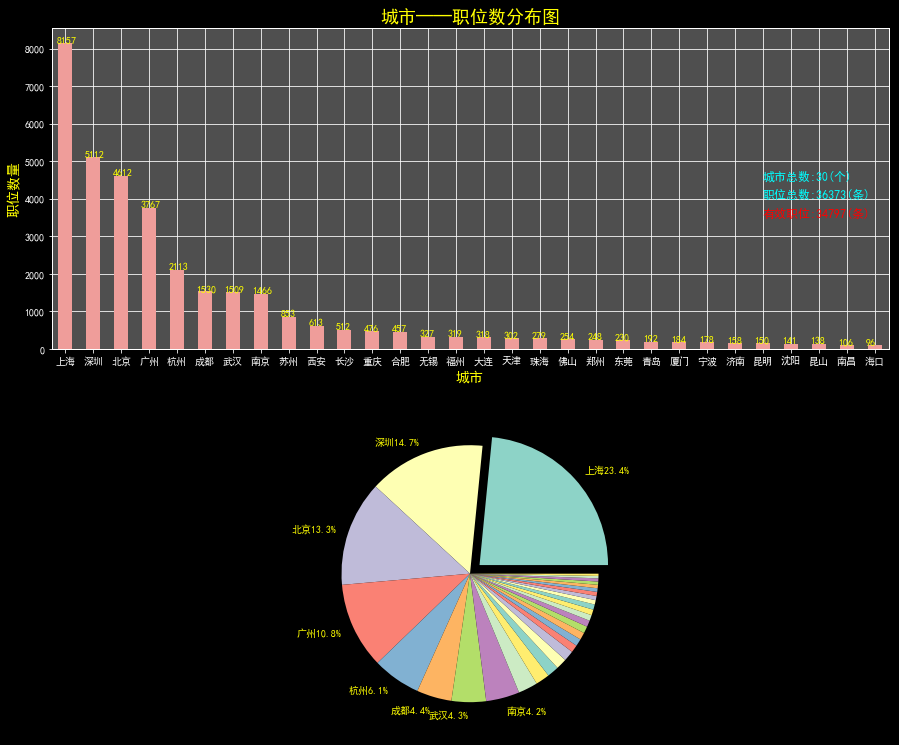

In [341]:
fig1 = plt.figure(1,facecolor = 'black',figsize=(15,13))#设置视图画布1

ax1 = fig1.add_subplot(2,1,1,facecolor='#4f4f4f',alpha=0.3);#在视图1中设置子图1,背景色灰色，透明度0.3(figure.add_subplot 和plt.suplot都行)
plt.tick_params(colors='white')#设置轴的颜色为白色
list_value.plot(kind='bar',rot=0,color='#ef9d9a');#画直方图图
#设置图标题，x和y轴标题
title = plt.title('城市——职位数分布图',fontsize=18,color='yellow');#设置标题
xlabel = plt.xlabel('城市',fontsize=14,color='yellow');#设置X轴轴标题
ylabel = plt.ylabel('职位数量',fontsize=14,color='yellow');#设置Y轴轴标题
#设置说明，位置在图的右上角
text1 = ax1.text(25,4500,'城市总数:30(个)',fontsize=12, color='cyan');#设置说明，位置在图的右上角
text2 = ax1.text(25,4000,'职位总数:36373(条)',fontsize=12, color='cyan');
text3 = ax1.text(25,3500,'有效职位:34797(条)',fontsize=12, color='red');
#添加每一个城市的坐标值

for i in range(len(list_value)):
    ax1.text(i-0.3,list_value[i],str(list_value[i]),color='yellow');
#可以用plt.grid(True)添加栅格线
#可以用下面语句添加注释箭头。指向上海，xy为坐标值、xytext为注释坐标值，facecolor为箭头颜色。
#arrow = plt.annotate('职位数:3107', xy=(1,3107), xytext=(3, 4000),color='blue',arrowprops=dict(facecolor='blue', shrink=0.05))
ax2 = fig1.add_subplot(2,1,2);#设置子图2，是位于子图1下面的饼状图
#为了方便，显示前8个城市的城市名称和比例、其余的不显示，用空字符列表替代，为此需要构造列表label_list和一个空字符列表['']*23。
x = list_value.values#x是数值列表，pie图的比例根据数值占整体的比例而划分
label_list = []#label_list是构造的列表，装的是前8个城市的名称+职位占比。
for i in range(8):
    t = list_value.values[i]/list_value.sum()*100
    city = list_value.index[i]
    percent = str('%.1f%%'%t)
    label_list.append(city+percent)
#labels参数原本是与数值对应的标签列表，此处30个城市过多，所以只取了前8个城市显示。
#explode即饼图中分裂的效果explode=（0.1，1，1，。。）表示第一块图片显示为分裂效果
labels = label_list + ['']*22
explode = tuple([0.1]+[0]*29)
plt.pie(x,explode=explode,labels=labels,textprops={'color':'yellow'});
#可加参数autopct='%1.1f%%'来显示饼图中每一块的比例，但是此处30个城市，如果全显示的话会非常拥挤不美观，所以只能手动通过labels参数来构造。
#若要显示标准圆形，可以添加：plt.axis('equal')

In [70]:
df_work_experience=df.work_experience

In [71]:
df_work_experience

0        3-4年经验
1          2年经验
2         无工作经验
3        3-4年经验
4         无工作经验
5         无工作经验
6        3-4年经验
7          2年经验
8         无工作经验
9        3-4年经验
10         2年经验
11       3-4年经验
12       3-4年经验
13         2年经验
14       3-4年经验
15       3-4年经验
16        无工作经验
17        无工作经验
18        无工作经验
19        无工作经验
20        无工作经验
21         2年经验
22        无工作经验
23         2年经验
24        无工作经验
25        无工作经验
26        无工作经验
27         1年经验
28        无工作经验
29        无工作经验
          ...  
36343      2年经验
36344     无工作经验
36345    3-4年经验
36346    3-4年经验
36347    5-7年经验
36348     无工作经验
36349    3-4年经验
36350     无工作经验
36351     无工作经验
36352     无工作经验
36353     无工作经验
36354     无工作经验
36355     无工作经验
36356     无工作经验
36357     无工作经验
36358    3-4年经验
36359    3-4年经验
36360     无工作经验
36361    5-7年经验
36362    3-4年经验
36363    3-4年经验
36364      2年经验
36365     无工作经验
36366     无工作经验
36367     无工作经验
36368     无工作经验
36369     无工作经验
36370     无工作经验
36371      2年经验
36372     无工作经验
Name: work_experience, L

In [72]:
df.work_experience.value_counts().sum()

36373

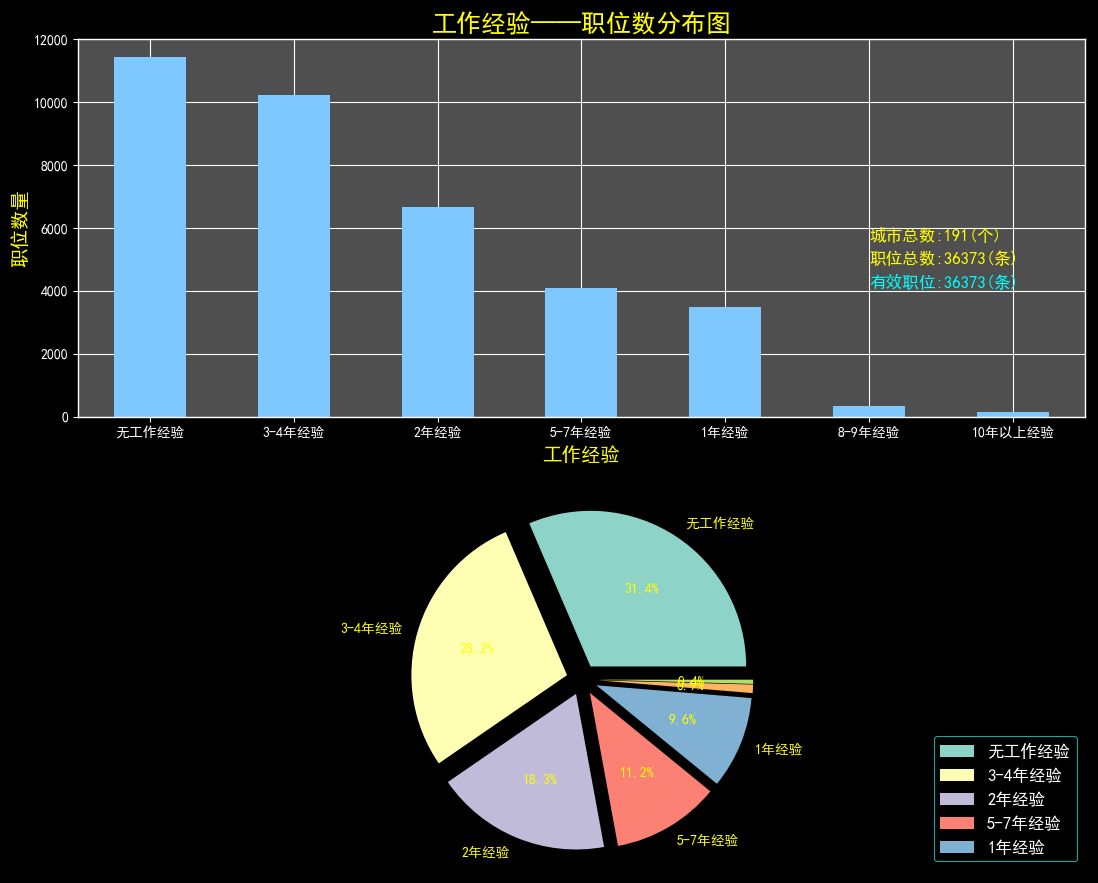

In [343]:
fig2 = plt.figure(2,facecolor = 'black',figsize=(13,11),dpi=100)

ax2_1 = fig2.add_subplot(2,1,1,facecolor='#4f4f4f',alpha=0.3)
plt.tick_params(colors='white')
df_work_experience.value_counts().plot(kind = 'bar',rot = 0,color='#7fc8ff')
title = plt.title('工作经验——职位数分布图',fontsize = 18,color = 'yellow')
xlabel = plt.xlabel('工作经验',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel('职位数量',fontsize = 14,color = 'yellow')
plt.grid(True)
text1_ = ax2_1.text(5,5600,'城市总数:191(个)',fontsize=12, color='yellow')
text2 = ax2_1.text(5,4850,'职位总数:36373(条)',fontsize=12, color='yellow')
text3 = ax2_1.text(5,4100,'有效职位:36373(条)',fontsize=12, color='cyan')
#设置子图2，是位于子图1下面的饼状图
ax2_2 = fig2.add_subplot(2,1,2)
#x是数值列表，pie图的比例根据数值占整体的比例而划分
x2 = df_work_experience.value_counts().values
labels = list(df_work_experience.value_counts().index[:5])+ ['']*2
explode = tuple([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.pie(x2,explode=explode,labels=labels,autopct='%1.1f%%',textprops={'color':'yellow'})
plt.axis('equal')#显示为等比例圆形
#设置图例，方位为右下角
legend = ax2_2.legend(loc='lower right',shadow=True,fontsize=12,edgecolor='cyan')


In [74]:
df.average.value_counts()

12500.0     4020
17500.0     2869
15000.0     2287
nan         2211
22500.0     2031
9000.0      1986
20000.0     1613
7000.0      1561
11500.0     1349
30000.0      871
10000.0      824
27500.0      803
8000.0       712
25000.0      620
7500.0       605
14000.0      591
10500.0      536
5250.0       535
12000.0      534
35000.0      501
11000.0      444
16000.0      429
6000.0       395
6500.0       368
37500.0      362
20833.0      324
9500.0       300
13500.0      283
8500.0       279
13000.0      271
            ... 
1100.0         1
87499.5        1
6150.0         1
16250.0        1
19166.5        1
13749.5        1
64000.0        1
66500.0        1
1050.0         1
56250.0        1
1041.0         1
64500.0        1
47083.0        1
38000.0        1
220000.0       1
38749.5        1
3150.0         1
40833.0        1
1249.5         1
95000.0        1
8958.0         1
1900.0         1
19166.0        1
41000.0        1
6450.0         1
6100.0         1
34999.5        1
2916.5        

In [75]:
df.average=df.average.astype(str)

In [76]:
df.average

0         9000.0
1        12500.0
2         7000.0
3        31249.5
4         7000.0
5        10000.0
6        20000.0
7         7000.0
8         3750.0
9        20000.0
10        9000.0
11       15000.0
12       30000.0
13       12500.0
14       12500.0
15       22500.0
16       17500.0
17        7000.0
18        9000.0
19        9000.0
20        9000.0
21        9000.0
22        7000.0
23       15000.0
24        7000.0
25        7000.0
26       12500.0
27       12500.0
28        9500.0
29       15000.0
          ...   
36343    11000.0
36344     7000.0
36345    15000.0
36346    15000.0
36347    13500.0
36348     7000.0
36349    15000.0
36350     7000.0
36351     7000.0
36352     7000.0
36353     7000.0
36354     7000.0
36355     7000.0
36356     7000.0
36357        nan
36358    29166.5
36359     2083.0
36360        nan
36361    58333.0
36362    11500.0
36363    12000.0
36364    10500.0
36365    10000.0
36366    35000.0
36367    35000.0
36368    35000.0
36369    35000.0
36370    35000

In [77]:
df_平均月薪 = df['average'].replace(['面议','found no element'],np.nan)

In [78]:
df_平均月薪

0         9000.0
1        12500.0
2         7000.0
3        31249.5
4         7000.0
5        10000.0
6        20000.0
7         7000.0
8         3750.0
9        20000.0
10        9000.0
11       15000.0
12       30000.0
13       12500.0
14       12500.0
15       22500.0
16       17500.0
17        7000.0
18        9000.0
19        9000.0
20        9000.0
21        9000.0
22        7000.0
23       15000.0
24        7000.0
25        7000.0
26       12500.0
27       12500.0
28        9500.0
29       15000.0
          ...   
36343    11000.0
36344     7000.0
36345    15000.0
36346    15000.0
36347    13500.0
36348     7000.0
36349    15000.0
36350     7000.0
36351     7000.0
36352     7000.0
36353     7000.0
36354     7000.0
36355     7000.0
36356     7000.0
36357        nan
36358    29166.5
36359     2083.0
36360        nan
36361    58333.0
36362    11500.0
36363    12000.0
36364    10500.0
36365    10000.0
36366    35000.0
36367    35000.0
36368    35000.0
36369    35000.0
36370    35000

In [79]:
df3=pd.DataFrame(data={'work_experience':df['work_experience'],'平均月薪':df_平均月薪})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 2 columns):
work_experience    36373 non-null object
平均月薪               36373 non-null object
dtypes: object(2)
memory usage: 284.2+ KB


In [80]:
import re
pattern = re.compile('([\.\d]+)')
listi = []
for i in range(len(df.average)):
    item = df.average.iloc[i].strip()
    result = re.findall(pattern,item)
    print(result)

['9000.0']
['12500.0']
['7000.0']
['31249.5']
['7000.0']
['10000.0']
['20000.0']
['7000.0']
['3750.0']
['20000.0']
['9000.0']
['15000.0']
['30000.0']
['12500.0']
['12500.0']
['22500.0']
['17500.0']
['7000.0']
['9000.0']
['9000.0']
['9000.0']
['9000.0']
['7000.0']
['15000.0']
['7000.0']
['7000.0']
['12500.0']
['12500.0']
['9500.0']
['15000.0']
['15000.0']
['10500.0']
['11500.0']
['18750.0']
['5250.0']
['7000.0']
['10000.0']
['12500.0']
['9500.0']
['12500.0']
['12500.0']
['10500.0']
['12500.0']
['5250.0']
['11000.0']
['14000.0']
['12500.0']
['17500.0']
['11500.0']
['16500.0']
[]
['8000.0']
['12500.0']
['11500.0']
['20000.0']
['21500.0']
['19000.0']
['6000.0']
['32500.0']
['3750.0']
['13333.0']
['9000.0']
['12000.0']
['12500.0']
['12000.0']
['10000.0']
['15000.0']
['9000.0']
['8000.0']
['11500.0']
['9000.0']
['13500.0']
['12000.0']
['9000.0']
['12500.0']
['7500.0']
['17500.0']
['37500.0']
['12500.0']
['3750.0']
['8500.0']
['5650.0']
['22500.0']
['11500.0']
['3750.0']
['35416.5']
['9000.0'

['30000.0']
['8000.0']
['11500.0']
['23000.0']
['7500.0']
['12500.0']
['11500.0']
['12500.0']
['22500.0']
['12500.0']
['22500.0']
['13500.0']
['8000.0']
['7000.0']
['5000.0']
['12500.0']
['10000.0']
['12500.0']
['6000.0']
['6150.0']
['10500.0']
['11500.0']
['15500.0']
['14000.0']
['10000.0']
['12500.0']
['5500.0']
['35000.0']
['17500.0']
['17500.0']
['15000.0']
['10000.0']
['7000.0']
['7000.0']
['6500.0']
['12500.0']
['17500.0']
['11500.0']
['10416.5']
['9000.0']
['6500.0']
['12000.0']
['14000.0']
['12500.0']
['12500.0']
['8000.0']
['9000.0']
['15000.0']
['7000.0']
['12500.0']
['10000.0']
['20000.0']
['17500.0']
['10500.0']
['15000.0']
['3750.0']
['7500.0']
['9000.0']
['12500.0']
['30000.0']
['10500.0']
['7000.0']
['12500.0']
['9000.0']
['29166.5']
['10000.0']
['20000.0']
['7500.0']
['15000.0']
['7000.0']
['12500.0']
['20833.0']
['15500.0']
['17500.0']
['5250.0']
['7000.0']
['12500.0']
['11000.0']
['12500.0']
['10500.0']
['35000.0']
['9000.0']
['12500.0']
['12500.0']
['17500.0']
['2500

['15000.0']
['9000.0']
['15000.0']
['7500.0']
['9000.0']
['11500.0']
['12500.0']
['17500.0']
['12500.0']
['7000.0']
['11500.0']
['9500.0']
['9000.0']
['5500.0']
['11000.0']
['16500.0']
['6000.0']
['11500.0']
['12000.0']
['12500.0']
['10416.5']
['14583.0']
['12500.0']
['12500.0']
['20000.0']
['22500.0']
['10000.0']
['10500.0']
['22500.0']
['7000.0']
['10500.0']
['8000.0']
['14583.0']
['62499.5']
['17500.0']
['9500.0']
['14500.0']
['12500.0']
['17500.0']
['12500.0']
['6500.0']
['9000.0']
['8000.0']
['3750.0']
['11500.0']
['11500.0']
['17500.0']
['12500.0']
['24999.5']
['12500.0']
['12500.0']
['20833.0']
['11000.0']
['13000.0']
['10000.0']
['15000.0']
['15000.0']
['12500.0']
['8500.0']
['10416.5']
['11000.0']
['17500.0']
['7000.0']
['7000.0']
['12500.0']
['7500.0']
['6000.0']
['60000.0']
['20000.0']
['8000.0']
['17500.0']
['15000.0']
['22500.0']
['7000.0']
['17500.0']
['12500.0']
['17500.0']
['12000.0']
['6500.0']
['5250.0']
['20000.0']
['13333.0']
['11500.0']
['8500.0']
['12000.0']
['850

['11000.0']
['9000.0']
['35000.0']
['22500.0']
['5250.0']
['14500.0']
['11500.0']
['15000.0']
['7000.0']
['12500.0']
['64000.0']
['20000.0']
['17500.0']
['17500.0']
['9000.0']
['12500.0']
['22500.0']
['16500.0']
['5000.0']
['20000.0']
['17500.0']
['5250.0']
['6000.0']
['17500.0']
['6500.0']
['12500.0']
['15000.0']
['22500.0']
['12500.0']
['8000.0']
['16000.0']
[]
['11500.0']
['25000.0']
['12500.0']
['22500.0']
['15000.0']
['35000.0']
['16500.0']
['11000.0']
['15000.0']
['7500.0']
['22500.0']
['40000.0']
['22500.0']
['11500.0']
['20000.0']
['37500.0']
['22500.0']
['18500.0']
['12500.0']
['13000.0']
['17500.0']
['15000.0']
[]
['9000.0']
['17500.0']
['12500.0']
['5250.0']
['9000.0']
['7500.0']
['17500.0']
['24999.5']
['12500.0']
['17500.0']
['29000.0']
['14000.0']
['10000.0']
['12500.0']
['11500.0']
['6000.0']
['9000.0']
['7500.0']
['7000.0']
['7000.0']
['14000.0']
['22500.0']
['6500.0']
['11500.0']
['8000.0']
['14000.0']
['8000.0']
['16500.0']
['9000.0']
['9000.0']
['6500.0']
['9000.0']


['32500.0']
['8500.0']
['18500.0']
['7000.0']
['20000.0']
['6500.0']
['9000.0']
['17500.0']
['10000.0']
['21000.0']
['8500.0']
['10500.0']
['9000.0']
['10000.0']
['14000.0']
['14000.0']
['20000.0']
['7000.0']
['7000.0']
[]
['12500.0']
['11500.0']
['8000.0']
['22500.0']
['7000.0']
['12500.0']
['7000.0']
[]
[]
['27500.0']
['17500.0']
['12500.0']
['6000.0']
['15000.0']
['5833.0']
['12500.0']
['15000.0']
['17500.0']
['8500.0']
['7000.0']
[]
['17500.0']
['7500.0']
['12500.0']
['35000.0']
['8500.0']
[]
['11500.0']
['30000.0']
[]
['17500.0']
['10000.0']
['6000.0']
['7000.0']
['20000.0']
['22500.0']
['37500.0']
['9000.0']
['16666.5']
['20000.0']
['11500.0']
['16000.0']
['7500.0']
['10000.0']
['17500.0']
['10500.0']
['19500.0']
['10000.0']
['11500.0']
['29166.5']
['5250.0']
['10000.0']
['10000.0']
['16000.0']
['22500.0']
['17500.0']
['20000.0']
['6000.0']
['8000.0']
['14500.0']
['7000.0']
['12500.0']
['18000.0']
['15000.0']
['12500.0']
['19500.0']
['15000.0']
['7000.0']
['9000.0']
['10000.0']
[

['22500.0']
['7000.0']
['15000.0']
['11500.0']
['22500.0']
['20000.0']
['9000.0']
['32500.0']
['12500.0']
['9500.0']
['22916.5']
['15000.0']
['12500.0']
['20000.0']
['27500.0']
['15000.0']
['12500.0']
['13500.0']
['16500.0']
['17500.0']
['13500.0']
['14000.0']
['11000.0']
['12000.0']
['15000.0']
['62499.5']
['10500.0']
['30000.0']
['7000.0']
['8000.0']
['7500.0']
['15000.0']
['20000.0']
['22000.0']
['29166.5']
['22500.0']
['17500.0']
['6000.0']
['12500.0']
['8000.0']
['17500.0']
['9000.0']
['7000.0']
['11500.0']
['13000.0']
['8500.0']
['17500.0']
['9000.0']
['7000.0']
['15000.0']
['12500.0']
['15000.0']
['7500.0']
['9000.0']
['10000.0']
['2500.0']
['17500.0']
['15000.0']
['11500.0']
[]
['11000.0']
['12000.0']
['17500.0']
['4700.0']
['11000.0']
['11500.0']
['9000.0']
['3750.0']
['17500.0']
['12500.0']
['15000.0']
['22500.0']
['7000.0']
['12500.0']
['24000.0']
['5250.0']
['17500.0']
['17500.0']
['7000.0']
['15000.0']
['24999.5']
['30000.0']
['14000.0']
['11500.0']
['15000.0']
['12500.0']

['20000.0']
['22500.0']
['2500.0']
['12500.0']
['8000.0']
['11500.0']
['30000.0']
['15000.0']
['8500.0']
['27500.0']
['2400.0']
['12500.0']
['5000.0']
['11500.0']
['7000.0']
['12500.0']
['17500.0']
['12500.0']
['7000.0']
['9000.0']
['17500.0']
['7000.0']
['8000.0']
['3000.0']
['12500.0']
['10000.0']
['12500.0']
['25000.0']
['20000.0']
['12500.0']
['6000.0']
['6500.0']
['7500.0']
['15000.0']
['10000.0']
['12000.0']
['12500.0']
['12500.0']
['12500.0']
['7000.0']
['25000.0']
['23500.0']
['8000.0']
['14000.0']
['23000.0']
['10000.0']
['12000.0']
['5250.0']
['9000.0']
['14000.0']
['60000.0']
['20000.0']
['49999.5']
['15000.0']
['11500.0']
['10500.0']
['22500.0']
['17500.0']
['22500.0']
['15000.0']
['10000.0']
['18750.0']
['12500.0']
['17500.0']
['12500.0']
['12500.0']
['20500.0']
['10500.0']
['24500.0']
['7000.0']
['9000.0']
['16000.0']
['9000.0']
['15000.0']
['17500.0']
['12500.0']
['11500.0']
['8000.0']
['17500.0']
['6000.0']
['9000.0']
['2500.0']
['15000.0']
['8000.0']
['14583.0']
['2750

['17500.0']
['12500.0']
['12500.0']
['12500.0']
['37500.0']
['15000.0']
['22500.0']
['12500.0']
['12500.0']
['5250.0']
['6500.0']
['8000.0']
['17500.0']
['7000.0']
['9500.0']
['5500.0']
['11500.0']
['37500.0']
['20000.0']
['9000.0']
['9000.0']
['14000.0']
['5750.0']
['11500.0']
['16000.0']
['9000.0']
['17500.0']
['8500.0']
['10000.0']
['22500.0']
['10500.0']
['7500.0']
['12500.0']
['12500.0']
['10000.0']
['11000.0']
['27500.0']
['9583.0']
['12500.0']
['22500.0']
['17500.0']
['37500.0']
['10000.0']
['12500.0']
['12500.0']
['12500.0']
['17500.0']
['9000.0']
['10000.0']
['15000.0']
['22500.0']
['9000.0']
['15000.0']
['27500.0']
['7500.0']
['12500.0']
['17500.0']
['7000.0']
['9000.0']
['17500.0']
['20500.0']
['10000.0']
['12500.0']
['35000.0']
['33333.0']
['15000.0']
['12500.0']
['45000.0']
['20833.0']
['9000.0']
['4500.0']
['9000.0']
['14000.0']
['3000.0']
['17500.0']
['50000.0']
['38749.5']
['15000.0']
['2500.0']
['35000.0']
['13500.0']
['7000.0']
['14000.0']
[]
['16000.0']
['12500.0']
[

['12500.0']
['9500.0']
['12500.0']
['14000.0']
['12500.0']
['14583.0']
['25000.0']
['13000.0']
['12500.0']
['12500.0']
['6500.0']
['12500.0']
['17500.0']
['16500.0']
['6500.0']
['30000.0']
['31249.5']
['12500.0']
['8000.0']
['3750.0']
['17500.0']
['7000.0']
['27083.0']
['20833.0']
['5750.0']
['22500.0']
['7000.0']
['20000.0']
['11250.0']
['17500.0']
['6250.0']
['11000.0']
['11500.0']
['15500.0']
['25000.0']
['7000.0']
['30000.0']
['7000.0']
['41666.5']
['15000.0']
['13000.0']
['11500.0']
['7500.0']
['9000.0']
['12000.0']
['19500.0']
['3500.0']
['7000.0']
['6250.0']
['17500.0']
['9000.0']
['17500.0']
['22500.0']
['12500.0']
['22500.0']
['18000.0']
['5250.0']
['5500.0']
['5250.0']
['8500.0']
['22500.0']
['15000.0']
['8000.0']
['12500.0']
['20000.0']
['17500.0']
['12500.0']
['12000.0']
['11500.0']
['12500.0']
['12500.0']
['12500.0']
['7750.0']
['15500.0']
['9000.0']
[]
['7000.0']
['32500.0']
['20833.0']
['9000.0']
['11500.0']
['15000.0']
['12500.0']
['11000.0']
['17500.0']
['11500.0']
['1

['5250.0']
['10500.0']
[]
['20500.0']
['30000.0']
['30000.0']
['9000.0']
['11500.0']
['22500.0']
['15000.0']
['9000.0']
['14000.0']
['9000.0']
['7000.0']
['35000.0']
['5250.0']
['12500.0']
['8500.0']
['11000.0']
['9000.0']
['22500.0']
['7500.0']
['17500.0']
['9000.0']
['15000.0']
['12500.0']
['9000.0']
['9000.0']
['9000.0']
['7500.0']
['5250.0']
['6000.0']
['13000.0']
['12500.0']
['11500.0']
['27500.0']
['12500.0']
['9000.0']
['17500.0']
['9500.0']
['12500.0']
['11500.0']
['22500.0']
['18750.0']
['7000.0']
['15000.0']
['12000.0']
['7000.0']
['17500.0']
['18000.0']
['14500.0']
['11000.0']
['12500.0']
['3500.0']
['17500.0']
['9000.0']
['11666.5']
['7500.0']
['10500.0']
['6000.0']
['12499.5']
['11500.0']
['14000.0']
['17500.0']
['40000.0']
['8000.0']
['12000.0']
['7000.0']
['11000.0']
['18750.0']
['30000.0']
['24999.5']
['5500.0']
['21500.0']
['12500.0']
['11500.0']
['35000.0']
['15000.0']
['15000.0']
['22500.0']
['12500.0']
['17500.0']
['30000.0']
['6000.0']
['10500.0']
['12499.5']
['125

['11500.0']
['8000.0']
['5250.0']
['12500.0']
['9000.0']
['8500.0']
['35000.0']
['20833.0']
['27500.0']
['15000.0']
['5250.0']
['22500.0']
['12500.0']
['14000.0']
['8500.0']
['17500.0']
['30000.0']
['10416.5']
['17500.0']
['12500.0']
['12500.0']
['15000.0']
['10000.0']
['17500.0']
['10000.0']
['11500.0']
['15000.0']
['15000.0']
['49999.5']
['22500.0']
['17500.0']
['22500.0']
['17500.0']
['5250.0']
['9000.0']
['9000.0']
['20833.0']
['10000.0']
['12500.0']
['15000.0']
['12500.0']
['12500.0']
['27500.0']
['17500.0']
['22500.0']
['12500.0']
['9000.0']
['9000.0']
['12500.0']
['8000.0']
['20000.0']
['25000.0']
['20000.0']
['20833.0']
['12500.0']
['11000.0']
['10000.0']
['7000.0']
['6500.0']
['6500.0']
['5000.0']
['19000.0']
['20000.0']
['7000.0']
['8000.0']
['10500.0']
['14000.0']
['27500.0']
['4250.0']
['17500.0']
['22500.0']
['15000.0']
['12500.0']
['37500.0']
['13000.0']
['5833.0']
['10000.0']
['12500.0']
['4500.0']
['11500.0']
['9000.0']
['15000.0']
['6500.0']
['17500.0']
['27500.0']
['1

['16666.5']
['22500.0']
['12500.0']
['11500.0']
['14500.0']
['12500.0']
['9000.0']
['17000.0']
['35000.0']
['16500.0']
['22500.0']
['3000.0']
['12500.0']
['4500.0']
['16000.0']
['12000.0']
['20000.0']
['10000.0']
['27500.0']
['10500.0']
['17500.0']
['10000.0']
['20000.0']
['22500.0']
['9000.0']
['9000.0']
['5000.0']
['11500.0']
['11500.0']
['12500.0']
['7000.0']
['17500.0']
['22500.0']
['7000.0']
['10500.0']
['28000.0']
['15000.0']
['11500.0']
['11500.0']
['10500.0']
['9500.0']
['13000.0']
['7000.0']
['7000.0']
['22500.0']
['20000.0']
['5250.0']
['22500.0']
['9000.0']
['14000.0']
['22500.0']
['10500.0']
['35000.0']
['23000.0']
['3000.0']
['20000.0']
['8000.0']
['10416.5']
['12500.0']
['15000.0']
['11500.0']
['7000.0']
['8000.0']
['12500.0']
['7500.0']
['9000.0']
['11500.0']
['11000.0']
['12500.0']
['12500.0']
['6500.0']
['6000.0']
['22500.0']
['12500.0']
['12500.0']
['9000.0']
['5250.0']
['24999.5']
['9000.0']
['22500.0']
['3750.0']
['12500.0']
['15000.0']
['12000.0']
['22500.0']
['110

['45000.0']
['5250.0']
['25000.0']
['5250.0']
['9250.0']
['15000.0']
['8000.0']
['11500.0']
['7000.0']
['11000.0']
['12500.0']
['2500.0']
['17500.0']
['9000.0']
['7000.0']
['12500.0']
['20000.0']
['6000.0']
['16500.0']
['7000.0']
['14583.0']
['24999.5']
['20000.0']
['6500.0']
['9000.0']
['25000.0']
['8500.0']
['40000.0']
['9000.0']
['9000.0']
['7500.0']
['5000.0']
['12000.0']
['7000.0']
['8000.0']
['22500.0']
['20000.0']
['15000.0']
['7000.0']
['21500.0']
['45000.0']
['18000.0']
['17500.0']
['7000.0']
['7000.0']
['20000.0']
['17500.0']
['17500.0']
['20833.0']
['5250.0']
['1750.0']
['9000.0']
['22500.0']
['27500.0']
['7000.0']
['22500.0']
['8000.0']
['6000.0']
['14000.0']
['3750.0']
['7000.0']
['20000.0']
['7000.0']
['7500.0']
['12500.0']
['11500.0']
['5250.0']
['6500.0']
['11000.0']
['7000.0']
['30000.0']
['30000.0']
['12500.0']
['17500.0']
['11500.0']
[]
['19000.0']
['12500.0']
['9000.0']
['7000.0']
['12500.0']
['17500.0']
['10000.0']
['12500.0']
['9000.0']
['5250.0']
['10416.5']
['80

['12500.0']
['12500.0']
['12500.0']
['6000.0']
['12500.0']
['6000.0']
['6000.0']
['22500.0']
['45000.0']
['27500.0']
['32500.0']
['17500.0']
['17500.0']
['12500.0']
['12500.0']
['16000.0']
['8000.0']
['8000.0']
['8000.0']
['12500.0']
['10500.0']
['8000.0']
['6000.0']
['22500.0']
['27500.0']
['27500.0']
['27500.0']
['18749.5']
['18749.5']
['25000.0']
['18749.5']
['28333.0']
['28333.0']
['10000.0']
['28333.0']
['28333.0']
['16500.0']
['22500.0']
['17500.0']
['17500.0']
['27500.0']
['7000.0']
['11500.0']
['27500.0']
['17500.0']
['27500.0']
['22500.0']
['22500.0']
['27500.0']
['7000.0']
['30000.0']
['15000.0']
['27500.0']
['27500.0']
['32500.0']
['19000.0']
['12500.0']
['17500.0']
['15000.0']
['6000.0']
['15000.0']
['17500.0']
['22500.0']
['15000.0']
['15000.0']
['15500.0']
['25000.0']
['10000.0']
['13000.0']
['16000.0']
['9000.0']
['25000.0']
['17500.0']
['14500.0']
['7000.0']
['3750.0']
['25000.0']
['35000.0']
['8000.0']
['20000.0']
['13000.0']
['7500.0']
['12500.0']
['12500.0']
['20000.

['37500.0']
[]
[]
[]
[]
[]
[]
[]
[]
['37500.0']
['3000.0']
['37500.0']
['7000.0']
['37500.0']
['30000.0']
['37500.0']
['30000.0']
['37500.0']
['31000.0']
['37500.0']
['30000.0']
['13500.0']
['15000.0']
['27500.0']
['45000.0']
['45000.0']
['45000.0']
['37500.0']
['3000.0']
['7000.0']
['37500.0']
['40000.0']
['25000.0']
['23000.0']
['22500.0']
['25000.0']
['37500.0']
['37500.0']
['22500.0']
['22500.0']
['27500.0']
['40000.0']
['9000.0']
['25000.0']
['32500.0']
['40000.0']
['12500.0']
['7000.0']
['30000.0']
['45000.0']
['22500.0']
['16000.0']
['7000.0']
['12500.0']
['45000.0']
['30000.0']
['37500.0']
['5500.0']
['22500.0']
['37500.0']
['15000.0']
['22500.0']
['30000.0']
['30000.0']
['6000.0']
['37500.0']
['50000.0']
['11500.0']
['50000.0']
['37500.0']
['37500.0']
['40000.0']
['30000.0']
['39000.0']
['30000.0']
['30000.0']
['30000.0']
['37500.0']
['40000.0']
['37500.0']
['37500.0']
['17500.0']
['17500.0']
['17500.0']
['35000.0']
['8500.0']
['37500.0']
['22500.0']
['17500.0']
['8500.0']
['2

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['27500.0']
[]
['27500.0']
['13500.0']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['32500.0']
['32500.0']
['9000.0']
['9000.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['9000.0']
['9000.0']
[]
['17916.5']
['22083.0']
['22500.0']
['20833.0']
['16000.0']
['14000.0']
['22500.0']
[]
['27500.0']
['35000.0']
['35000.0']
['17500.0']
['27500.0']
['27500.0']
['1750.0']
['17500.0']
['3750.0']
['16000.0']
['35000.0']
['17500.0']
['35000.0']
['3750.0']
['35000.0']
['12500.0']
['12500.0']
['22500.0']
['25000.0']
['20000.0']
[]
['16000.0']
['115

['35000.0']
['35000.0']
['27500.0']
['9000.0']
['12500.0']
['30000.0']
['12500.0']
['15000.0']
['12500.0']
['9000.0']
['12500.0']
['12500.0']
['3750.0']
['37500.0']
['16500.0']
['5250.0']
['9000.0']
['5250.0']
['17500.0']
['15000.0']
['14000.0']
['14000.0']
['14000.0']
['14000.0']
['14000.0']
['24000.0']
['22500.0']
['26500.0']
['9000.0']
['9000.0']
['22500.0']
['9000.0']
['5250.0']
['11500.0']
['22500.0']
['12500.0']
['9000.0']
['9000.0']
['11500.0']
['22500.0']
['12500.0']
['18000.0']
['15000.0']
['22500.0']
['15000.0']
['22500.0']
['27500.0']
['21500.0']
['22500.0']
['20000.0']
['9500.0']
['9000.0']
['12500.0']
['12500.0']
['7000.0']
['7000.0']
['20833.0']
['12500.0']
['30000.0']
['15000.0']
['13000.0']
['13000.0']
['14500.0']
['4000.0']
['15000.0']
['15000.0']
['7000.0']
['17500.0']
['17500.0']
['11000.0']
['14000.0']
['2500.0']
['6500.0']
['27500.0']
['12500.0']
['35000.0']
['10000.0']
['9000.0']
['30000.0']
['22500.0']
['9000.0']
['22500.0']
['32500.0']
['20000.0']
['20000.0']
['

['11500.0']
['14000.0']
['12499.5']
['17500.0']
['17500.0']
['20833.0']
['12500.0']
['12500.0']
['17500.0']
['17500.0']
['11500.0']
['14000.0']
['21500.0']
['7000.0']
['20000.0']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['10000.0']
['10000.0']
['10000.0']
['16500.0']
['26500.0']
['37500.0']
['37500.0']
['37500.0']
['25000.0']
['22500.0']
['15000.0']
['22500.0']
['85000.0']
['15000.0']
['45000.0']
['14000.0']
['21500.0']
['12500.0']
['17500.0']
['11500.0']
['22500.0']
[]
[]
[]
['7250.0']
[]
['12500.0']
['12500.0']
['8000.0']
[]
['14000.0']
['10500.0']
[]
[]
[]
[]
[]
[]
[]
[]
['17500.0']
[]
['22500.0']
['20000.0']
[]
[]
['15000.0']
[]
[]
['12500.0']
['17500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['17500.0']
[]
['12500.0']
['12500.0']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


['6700.0']
['16500.0']
['11000.0']
['12500.0']
['12500.0']
['12500.0']
['12500.0']
['10500.0']
['20000.0']
['20000.0']
['20000.0']
['20000.0']
['20000.0']
['8000.0']
['17500.0']
['11000.0']
['20000.0']
['5250.0']
['22500.0']
['7000.0']
['9000.0']
['9500.0']
['12000.0']
['19000.0']
['18000.0']
['12500.0']
['35000.0']
['12000.0']
['35000.0']
['40000.0']
['7000.0']
['8000.0']
['17500.0']
['11500.0']
['17500.0']
['11000.0']
['5250.0']
['7000.0']
['10500.0']
['9000.0']
['12500.0']
['16666.5']
['17000.0']
['27500.0']
['15000.0']
['12500.0']
['15000.0']
['20000.0']
['12500.0']
['20000.0']
['27500.0']
['25000.0']
['17500.0']
['10000.0']
['10000.0']
['12500.0']
['10500.0']
['10500.0']
['30000.0']
['30000.0']
['11500.0']
['11500.0']
['9000.0']
['7000.0']
['20000.0']
['2500.0']
['9000.0']
['12500.0']
['34000.0']
['12499.5']
['12500.0']
['18000.0']
['7500.0']
['9500.0']
['25000.0']
['22500.0']
['7000.0']
['17500.0']
['17500.0']
['17500.0']
['15500.0']
['12500.0']
['12000.0']
['13500.0']
['9000.0']

['15000.0']
['15000.0']
['7500.0']
['8000.0']
['20000.0']
['6000.0']
['7500.0']
['20000.0']
['15000.0']
['15000.0']
['20000.0']
['30000.0']
['8000.0']
['7500.0']
['8000.0']
['7500.0']
['8000.0']
['9000.0']
['17500.0']
[]
['22500.0']
[]
[]
['17500.0']
['12500.0']
['9000.0']
['9000.0']
['10000.0']
['12500.0']
['9000.0']
['12500.0']
['17500.0']
['14583.0']
['40000.0']
['16000.0']
['37500.0']
['37500.0']
['37500.0']
['22500.0']
['26000.0']
['37500.0']
['32500.0']
['9500.0']
['20000.0']
['21000.0']
['15000.0']
['12500.0']
['40000.0']
['28500.0']
['9000.0']
['37500.0']
['37500.0']
['12500.0']
['37500.0']
['12500.0']
['12000.0']
['10000.0']
['54166.0']
['22500.0']
['10000.0']
['10000.0']
['10000.0']
['10000.0']
['10000.0']
['10000.0']
['22500.0']
['20000.0']
['37500.0']
['11500.0']
['15000.0']
['15000.0']
['24000.0']
['19000.0']
['12500.0']
['16000.0']
['20000.0']
['20000.0']
['15000.0']
['20000.0']
['11500.0']
['22500.0']
['15000.0']
['12000.0']
['10500.0']
['10000.0']
['10000.0']
['12500.0'

['11500.0']
['17500.0']
['17500.0']
['17500.0']
['14583.0']
['12500.0']
['14583.0']
['12500.0']
['21500.0']
['17500.0']
['13500.0']
['20833.0']
['22500.0']
['14000.0']
['7000.0']
['22500.0']
['15000.0']
['8000.0']
['15000.0']
['15000.0']
['3750.0']
['15000.0']
['22500.0']
['15000.0']
[]
['11500.0']
['11500.0']
['20000.0']
['20000.0']
['12500.0']
['22500.0']
['15000.0']
['9000.0']
['37500.0']
['9500.0']
['7500.0']
['17500.0']
['22916.0']
['22500.0']
['13000.0']
['11500.0']
['3750.0']
['11000.0']
['12500.0']
['21000.0']
['17500.0']
['7000.0']
['17500.0']
['12500.0']
['7000.0']
['7000.0']
['9000.0']
['24000.0']
['9000.0']
['9000.0']
['5250.0']
['17500.0']
['9000.0']
['11500.0']
['20000.0']
['11500.0']
['35000.0']
['25000.0']
['8000.0']
['8000.0']
['15000.0']
['8500.0']
['11500.0']
['9000.0']
['17500.0']
['27500.0']
['22500.0']
['22500.0']
['17500.0']
['17500.0']
['9000.0']
['9000.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0'

['9000.0']
['12500.0']
['9500.0']
['4000.0']
['12500.0']
['6500.0']
['29166.5']
['6500.0']
['8500.0']
['12500.0']
['14000.0']
['9500.0']
['20000.0']
['17500.0']
['11500.0']
['12500.0']
['14000.0']
['27083.0']
['17500.0']
['22500.0']
['16000.0']
['20000.0']
['10000.0']
['11000.0']
['25000.0']
['9000.0']
['16500.0']
['15000.0']
['37500.0']
['18500.0']
['20000.0']
['10500.0']
['27500.0']
['10500.0']
['20000.0']
['5250.0']
['12500.0']
['19000.0']
['15000.0']
['30000.0']
['30000.0']
['12500.0']
['12500.0']
['9000.0']
['7000.0']
['7000.0']
['7000.0']
['17500.0']
['9000.0']
['7000.0']
['17500.0']
['5000.0']
['11500.0']
['7500.0']
['15000.0']
['15000.0']
['9000.0']
['20000.0']
['13500.0']
['20000.0']
['12500.0']
['10000.0']
['12500.0']
['23000.0']
['23000.0']
['11500.0']
['10500.0']
['10500.0']
['22500.0']
['9000.0']
['9000.0']
['7000.0']
['7000.0']
['12500.0']
['9000.0']
['9000.0']
['20000.0']
['7000.0']
['60000.0']
['18500.0']
['14000.0']
['14000.0']
['22500.0']
['12500.0']
['18750.0']
['200

['17500.0']
['14000.0']
['55000.0']
['10500.0']
['17500.0']
['22500.0']
['27500.0']
['12500.0']
['15000.0']
['25000.0']
['5500.0']
['21500.0']
['9500.0']
['25000.0']
['12500.0']
['41666.5']
['22500.0']
['41666.5']
['41666.5']
['12500.0']
['41666.5']
['27500.0']
['12500.0']
['22500.0']
['22500.0']
['6500.0']
['15000.0']
['17500.0']
['12500.0']
['12500.0']
['15000.0']
['12500.0']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['27500.0']
['15500.0']
['12500.0']
['12000.0']
['12500.0']
['17916.5']
[]
['17500.0']
['7500.0']
['12500.0']
['17500.0']
['15000.0']
['22500.0']
['7000.0']
['12500.0']
['17500.0']
[]
['25000.0']
['7500.0']
[]
['25000.0']
['25000.0']
[]
['15000.0']
[]
['11500.0']
[]
[]
[]
[]
['12500.0']
['30000.0']
['15000.0']
['6000.0']
[]
['25000.0']
['10000.0']
['12500.0']
['15000.0']
['9000.0']
['22500.0']
['17500.0']
['15833.0']
['15000.0']
['15000.0']
['12500.0']
['17500.0']
['12500.0']
['17500.0']
['8500.0']
['5750.0']
['11500.0']
['20000.0']
['15000.0']
['9000.0']
['15000.0']
['17500.0']
['1750

['17500.0']
['6500.0']
['8000.0']
['6500.0']
['15000.0']
['16000.0']
['9583.0']
['6000.0']
['10000.0']
['14999.5']
['14999.5']
['14999.5']
['11500.0']
['12000.0']
['10833.0']
['15000.0']
['10000.0']
['10000.0']
['12500.0']
['12500.0']
['12500.0']
['20000.0']
['37500.0']
['37500.0']
['24999.5']
['15000.0']
['12500.0']
['13500.0']
['12000.0']
['12000.0']
['12000.0']
['12000.0']
['12000.0']
['12500.0']
['11500.0']
['8000.0']
['7500.0']
['12500.0']
['7500.0']
['8000.0']
['7000.0']
['9500.0']
['12500.0']
['12500.0']
['12500.0']
['11500.0']
['10000.0']
['10500.0']
['10500.0']
['7000.0']
['21500.0']
['11500.0']
['17500.0']
['9500.0']
['19000.0']
['6000.0']
['17500.0']
['12500.0']
['12500.0']
['12500.0']
['11500.0']
['9000.0']
['22500.0']
['17500.0']
['9000.0']
['15000.0']
['12499.5']
['15000.0']
['25000.0']
['25000.0']
['15416.5']
['31249.5']
['17500.0']
['30500.0']
['18500.0']
['9000.0']
['22500.0']
['12500.0']
['22500.0']
['22500.0']
['22500.0']
['12000.0']
['10000.0']
['12500.0']
['17500.0

['10000.0']
['15000.0']
['10416.5']
['6500.0']
['14000.0']
['11000.0']
['6000.0']
['15000.0']
['12500.0']
['7000.0']
['11500.0']
['20000.0']
['9000.0']
['14000.0']
['11500.0']
['15000.0']
['11000.0']
['15000.0']
['17500.0']
['7000.0']
['11500.0']
['10500.0']
['9000.0']
['10500.0']
['12500.0']
['17500.0']
['22916.5']
['22916.5']
['22916.5']
['16666.5']
['9000.0']
['9000.0']
['9000.0']
['9000.0']
['22500.0']
['7500.0']
['7500.0']
['20000.0']
['10416.5']
['29166.5']
['17500.0']
['12500.0']
['8000.0']
['6500.0']
['17500.0']
['11500.0']
['15000.0']
['10000.0']
['17500.0']
['17500.0']
['12500.0']
['9000.0']
['20000.0']
['17500.0']
['15000.0']
['12500.0']
['11500.0']
['30000.0']
['5000.0']
['18750.0']
['27083.0']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['10500.0']
['10500.0']
['11500.0']
['10500.0']
['10500.0']
['13500.0']
['10000.0']
['10500.0']
['10500.0']
['15416.0']
['17083.0']
['15000.0']
['15000.0']
['10500.0']
['15000.0']
['15000.0']
['30000.0']
['30000.0']
['20000.0']
['8000.0']
[

['12500.0']
['17500.0']
['22500.0']
['21500.0']
['25000.0']
['12500.0']
['10500.0']
['10000.0']
['12500.0']
['10500.0']
['9500.0']
['12500.0']
['4500.0']
['12500.0']
['30000.0']
['22500.0']
['22500.0']
['32500.0']
['32500.0']
['12500.0']
['7000.0']
['7000.0']
['36000.0']
['17500.0']
['15500.0']
['17500.0']
['16500.0']
['11500.0']
['17500.0']
['19500.0']
['45000.0']
['22500.0']
['20000.0']
['13000.0']
['20833.0']
['20833.0']
['14583.0']
['22500.0']
['9000.0']
['7500.0']
['14000.0']
['9000.0']
['7500.0']
['50000.0']
['9000.0']
['7500.0']
['22500.0']
['12500.0']
['10000.0']
['12500.0']
['16000.0']
['37499.5']
['12500.0']
['15500.0']
['11500.0']
['14000.0']
['9000.0']
['9000.0']
['11000.0']
['7500.0']
['17500.0']
['17500.0']
['17500.0']
['11000.0']
['11000.0']
['17500.0']
['11000.0']
['17500.0']
['11000.0']
['17500.0']
['11000.0']
['17500.0']
['11000.0']
['11000.0']
['17500.0']
['11000.0']
['11000.0']
['17500.0']
['11000.0']
['8000.0']
['7000.0']
['10500.0']
['24000.0']
['21500.0']
['35000

['17500.0']
['9000.0']
['20833.0']
['9000.0']
['12500.0']
['21500.0']
['17000.0']
['15000.0']
['10000.0']
['12500.0']
['12500.0']
['11000.0']
['9000.0']
['16000.0']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['12500.0']
['7000.0']
['12500.0']
['17500.0']
['1750.0']
['12500.0']
[]
['9000.0']
['7500.0']
['17000.0']
['7000.0']
['22500.0']
['11500.0']
['8500.0']
['10500.0']
['12500.0']
['22500.0']
['31249.5']
['10500.0']
['11500.0']
['20000.0']
['22500.0']
['37500.0']
['20000.0']
['16000.0']
['13500.0']
['24000.0']
['18000.0']
['13500.0']
['40000.0']
['22500.0']
['15000.0']
['12500.0']
['12000.0']
['12500.0']
['12500.0']
['30000.0']
['14500.0']
['10500.0']
['15000.0']
['22500.0']
['12500.0']
['10000.0']
['10000.0']
['5250.0']
['8000.0']
['22500.0']
['17500.0']
['17500.0']
['17500.0']
['24000.0']
['24000.0']
['21500.0']
['21500.0']
['24000.0']
['12499.5']
['21500.0']
['12500.0']
['11500.0']
['9000.0']
['27000.0']
['11000.0']
['7800.0']
['9000.0']
['9000.0']
['12500.0']
['17500.0']
['12500.

['15500.0']
['15500.0']
['15500.0']
['15500.0']
['15500.0']
['15500.0']
['15500.0']
['25000.0']
['15500.0']
['17500.0']
['9000.0']
['10500.0']
['9000.0']
['20000.0']
['22500.0']
['22500.0']
['37500.0']
['27500.0']
['6500.0']
['22500.0']
['27500.0']
['16500.0']
['11000.0']
['7500.0']
['15000.0']
['13500.0']
['17500.0']
['22916.5']
['20000.0']
['31250.0']
['31250.0']
['6500.0']
['6500.0']
['12500.0']
['17500.0']
['12500.0']
['48000.0']
['35000.0']
['27500.0']
['48000.0']
['60000.0']
['8000.0']
['13500.0']
['12500.0']
['12500.0']
['17500.0']
['13500.0']
['13500.0']
['13500.0']
['13500.0']
['13500.0']
['37500.0']
['10000.0']
['20000.0']
['11666.5']
['14583.0']
[]
[]
['7500.0']
['14000.0']
['7500.0']
['13000.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['18500.0']
['11500.0']
['9000.0']
['12500.0']
['15000.0']
['15000.0']
['11500.0']
['15000.0']
['45000.0']
['45000.0']
['15000.0']
['9000.0']
['15000.0']
['7000.0']
['12500.0']
['17500.0']
['12500.0']
['9000.0']

['22500.0']
['7500.0']
['9000.0']
['20000.0']
['4000.0']
['20833.0']
['16500.0']
['22500.0']
['7000.0']
['7000.0']
['17000.0']
['22500.0']
['11500.0']
['22500.0']
['10000.0']
['13000.0']
['13000.0']
['13000.0']
['12500.0']
['17500.0']
['30000.0']
['12500.0']
['9000.0']
['11500.0']
['7000.0']
['11000.0']
['16500.0']
['10000.0']
['13500.0']
['22500.0']
['22500.0']
['32500.0']
['18000.0']
['22500.0']
['7500.0']
['15000.0']
['22500.0']
['10500.0']
['10500.0']
['8500.0']
['5250.0']
['22500.0']
['15000.0']
['7000.0']
['10000.0']
['10000.0']
['10000.0']
['20000.0']
['11500.0']
['12000.0']
['19000.0']
['15000.0']
['10500.0']
['3750.0']
['3750.0']
['12000.0']
['3750.0']
['7000.0']
['12500.0']
['12500.0']
['15000.0']
['15000.0']
['11500.0']
['7000.0']
['12500.0']
['250000.0']
['35000.0']
['17500.0']
['12500.0']
['17500.0']
['15000.0']
['35000.0']
['6000.0']
['16000.0']
['7000.0']
['19500.0']
['24000.0']
['7000.0']
['22500.0']
['12500.0']
['22500.0']
['17500.0']
['17500.0']
['10500.0']
['7000.0']

['8000.0']
['8000.0']
['8000.0']
['8000.0']
['15000.0']
['16500.0']
[]
[]
[]
['3750.0']
['5250.0']
['9000.0']
['13000.0']
['5250.0']
['13500.0']
['35000.0']
['12500.0']
['10500.0']
['27500.0']
['12500.0']
['13000.0']
['30000.0']
['30000.0']
['9500.0']
['12500.0']
['17916.5']
['15000.0']
['29166.5']
['15000.0']
['29166.5']
['29166.5']
['16000.0']
['12500.0']
['14000.0']
['22500.0']
['15000.0']
['7500.0']
['10500.0']
['11500.0']
['12500.0']
['15000.0']
['6000.0']
['22500.0']
['11500.0']
['12500.0']
['9000.0']
['12500.0']
['15000.0']
['12500.0']
['4500.0']
['27500.0']
['22000.0']
['28000.0']
['27000.0']
['15000.0']
['15000.0']
['9000.0']
['9000.0']
['37499.5']
['17500.0']
['9500.0']
['12500.0']
['10000.0']
['10000.0']
['20000.0']
['12500.0']
['20000.0']
['15000.0']
['24000.0']
['37500.0']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['14583.0']
['15000.0']
['17500.0']
['12000.0']
['14000.0']
['16000.0']
['8500.0']
['15000.0']
['3

['17500.0']
['12500.0']
['35000.0']
['14000.0']
['11000.0']
['10500.0']
['20000.0']
['42500.0']
['9000.0']
['17500.0']
['9000.0']
['7000.0']
['8000.0']
['40000.0']
['5000.0']
['11500.0']
['17500.0']
['17500.0']
['17500.0']
['17500.0']
['15000.0']
['30000.0']
['17500.0']
['5250.0']
['12500.0']
['8500.0']
['16000.0']
['30000.0']
['30000.0']
['40000.0']
['12500.0']
['17500.0']
['20833.0']
['21500.0']
['25000.0']
['11500.0']
['30000.0']
['12500.0']
['22500.0']
['14000.0']
['17500.0']
['22500.0']
['22500.0']
['22500.0']
['22500.0']
['22500.0']
['27500.0']
['12500.0']
['12000.0']
['23000.0']
[]
['10000.0']
['17500.0']
['15000.0']
['17500.0']
['12500.0']
['17500.0']
['17500.0']
['13000.0']
['20500.0']
['6500.0']
['15000.0']
['14000.0']
['12500.0']
['6000.0']
['12500.0']
['14583.0']
['14583.0']
['20833.0']
['16000.0']
['14583.0']
['20833.0']
['32500.0']
['15000.0']
['26000.0']
['11500.0']
['10500.0']
['30000.0']
['40000.0']
['55000.0']
['12500.0']
['12500.0']
['12500.0']
['20000.0']
['13500.0'

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['9000.0']
['9000.0']
['9000.0']
['9000.0']
['9000.0']
['22500.0']
['2500.0']
['12500.0']
['15000.0']
['22500.0']
['22500.0']
['17500.0']
['25000.0']
['7000.0']
['22500.0']
['22500.0']
['9166.5']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['7000.0']
['9166.5']
['4250.0']
['5250.0']
['1750.0']
['5250.0']
['5250.0']
['5250.0']
['9500.0']
['1500.0']
['6000.0']
['60000.0']
['60000.0']
['6000.0']
['2500.0']
['2500.0']
['3000.0']
['5500.0']
['3900.0']
['4500.0']
['5500.0']
['5000.0']
['6000.0']
['1500.0']
['5500.0']
['1900.0']
['2499.5']
['2500.0']
['10000.0']
['3000.0']
['3750.0']
['6500.0']
['6500.0']
['4000.0']
['5750.0']
['4500.0']
['6500.0']
['4000.0']
['1666.0']
['2500.0']
['3550.0']
['3500.0']
['2500.0']
['2500.0']
['1750.0']
['19000.0']
['14000.0']
['5250.0']
['12500.0']
['13000.0']
['11000.0']
['12500.0']
['9000.0']
['6000.0']
['12000.0']
['8000.0']
['12500.0']
['12500.0']
['55000.0']
['58333.0']
['220000.0']
['2500.0']
['58333.0']
['2500.0']
['1750.0']
['3600.0']
['3000.0']
['1791

In [81]:
#构造一个listi存放转化后float型的‘平均月薪’
import re
pattern = re.compile('([\.\d]+)')
listi = []
for i in range(len(df.average)):
    item = df.average.iloc[i].strip()
    result = re.findall(pattern,item)
    try:
        if str(result)!='None':
            listi.append(float(result[0]))
        elif (item.strip()=='found no element' or item.strip()=='面议'):
            listi.append(np.nan)
        else:
            print(item)
    except Exception as e:
        print(item,type(item),repr(e))






nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of range')
nan <class 'str'> IndexError('list index out of 

In [82]:
type(listi)

list

In [83]:
type(df3['平均月薪'])

pandas.core.series.Series

In [158]:
#将df3.平均月薪列替换掉,同时给df新增一列'df_平均月薪'做备用。

df['df_平均月薪'] = df3['平均月薪']

In [85]:
df3['平均月薪'].value_counts()
df3['平均月薪'][:10]#查看前10个值
type(df3['平均月薪'][1])#看看现在月薪的类型是不是浮点型vv 
df3['平均月薪'].value_counts().sum()#看看月薪样本总数


36373

In [86]:
df3['平均月薪']=df3['平均月薪'].astype(float)
df3['平均月薪'].mean()#看看这36373个月薪样本的平均值是多少？

16269.174126222119

In [87]:
grouped3 = df3['平均月薪'].groupby(df3['work_experience'])
grouped3.mean()

work_experience
10年以上经验    39609.847826
1年经验       12236.073560
2年经验       14536.249249
3-4年经验     17512.188255
5-7年经验     23404.910935
8-9年经验     30072.165000
无工作经验      14200.717095
Name: 平均月薪, dtype: float64

In [89]:
#新增一个平均值，即所有非空df3['平均月薪']的平均值
s3 = pd.Series(data = {'平均值':df3['平均月薪'].mean()})
result3 = grouped3.mean().append(s3)
#sort_values()方法可以对值进行排序，默认按照升序，round（1）表示小数点后保留1位小数。
result3.sort_values(ascending=False).round(1)

10年以上经验    39609.8
8-9年经验     30072.2
5-7年经验     23404.9
3-4年经验     17512.2
平均值        16269.2
2年经验       14536.2
无工作经验      14200.7
1年经验       12236.1
dtype: float64

In [90]:
result3.dropna(axis=0, how='any', inplace=True)
result3

10年以上经验    39609.847826
1年经验       12236.073560
2年经验       14536.249249
3-4年经验     17512.188255
5-7年经验     23404.910935
8-9年经验     30072.165000
无工作经验      14200.717095
平均值        16269.174126
dtype: float64

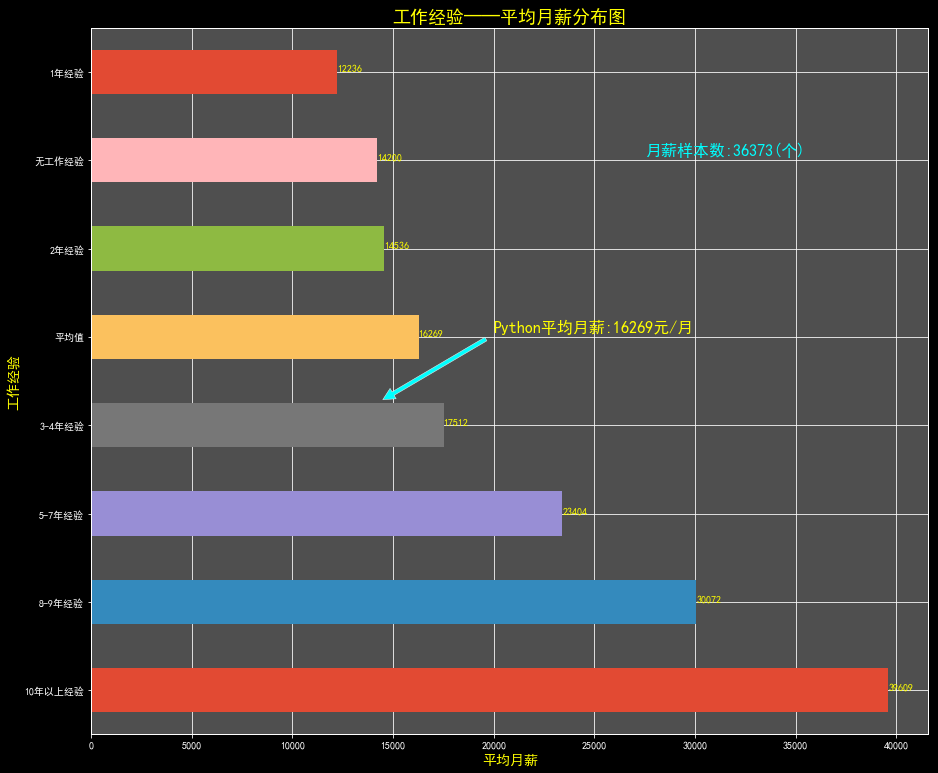

In [270]:
matplotlib.style.use('ggplot')
fig3 = plt.figure(3,facecolor = 'black',figsize=(15,13))
ax3 = fig3.add_subplot(1,1,1,facecolor='#4f4f4f',alpha=0.3)
result3.sort_values(ascending=False).round(1).plot(kind='barh',rot=0)
#设置标题、x轴、y轴的标签文本
title = plt.title('工作经验——平均月薪分布图',fontsize = 18,color = 'yellow')
xlabel= plt.xlabel('平均月薪',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel('工作经验',fontsize = 14,color = 'yellow')
#添加值标签
list3 = result3.sort_values(ascending=False).values
for i in range(len(list3)):
    ax3.text(list3[i],i,str(int(list3[i])),color='yellow')
#设置标识箭头
arrow = plt.annotate('Python平均月薪:16269元/月', xy=(14197,3.25), xytext=(20000,4.05),color='yellow',fontsize=16,arrowprops=dict(facecolor='cyan', shrink=0.05))
#设置图例注释（36373来源：df2['平均月薪'].value_counts().sum()）
text= ax3.text(27500,6.05,'月薪样本数:36373(个)',fontsize=16, color='cyan')
#设置轴刻度文字颜色为白色
plt.tick_params(colors='white')

In [112]:
#此处df['df_工作城市']是之前经过筛选后的30个城市数据
df4=pd.DataFrame(data={'work_city':df['work_city'],'平均月薪':df['df_平均月薪']})
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 2 columns):
work_city    36373 non-null object
平均月薪         36373 non-null object
dtypes: object(2)
memory usage: 284.2+ KB


In [143]:
df['df_平均月薪']=df['df_平均月薪'].astype(float)

In [136]:
df4['平均月薪']=df4['平均月薪'].astype(float)
grouped4 = df4.groupby('work_city')


In [168]:
grouped4

In [139]:
df4.groupby('work_city').mean()#查看对191个城市分组后，各个城市月薪的平均值

,平均月薪
work_city,
三亚,8333.333333
三门峡,11761.363636
上海,18620.852395
上饶,9636.363636
东莞,13503.265351
东营,5500.000000
中山,12477.297872
临沂,6416.666667
临沧,5250.000000


In [140]:
grouped4.count().sum()#查看对191个城市分组后筛选出的平均月薪样本数

平均月薪    34162
dtype: int64

In [209]:
df['df_平均月薪']=df['df_平均月薪'].astype(float)
#新增一个平均值，即所有非空df2['平均月薪']的平均值
s4 = pd.Series(data = {'平均值':df['df_平均月薪'].mean()})

In [211]:
result4 = grouped4.mean()
result4

,平均月薪
work_city,
三亚,8333.333333
三门峡,11761.363636
上海,18620.852395
上饶,9636.363636
东莞,13503.265351
东营,5500.000000
中山,12477.297872
临沂,6416.666667
临沧,5250.000000


In [212]:
#取岗位最多的前30个城市
result4=result4.loc[['上海', '深圳', '北京', '广州', '杭州', '成都', '武汉', '南京', '苏州', '西安', '长沙', '重庆',
        '合肥', '无锡', '福州', '大连', '天津', '珠海', '佛山', '郑州', '东莞', '青岛', '厦门', '宁波',
       '济南', '昆明', '沈阳', '昆山', '南昌', '海口']] 

In [213]:
#sort_values()方法可以对值进行排序，默认按照升序，round（1）表示小数点后保留1位小数。
result4.sort_values(by='平均月薪',ascending=False).round(1)

,平均月薪
work_city,
北京,20181.7
上海,18620.9
深圳,17969.9
杭州,17621.7
宁波,17541.9
广州,15570.7
佛山,15467.3
海口,15046.9
大连,14565.5


In [214]:
result4.dropna(axis=0, how='any', inplace=True)
result4

,平均月薪
work_city,
上海,18620.852395
深圳,17969.939873
北京,20181.663842
广州,15570.697849
杭州,17621.669054
成都,14024.713502
武汉,12714.755647
南京,14530.031471
苏州,14511.831481


ValueError: Image size of 1350x792336 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 60x52 with 1 Axes>

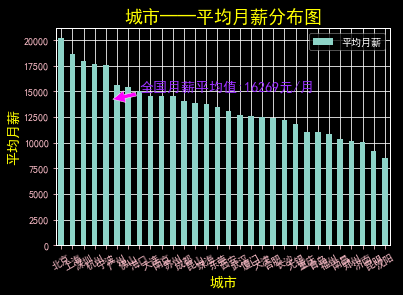

In [338]:
#可以通过style.available查看可用的绘图风格，总有一款适合你
matplotlib.style.use('dark_background')
fig4 = plt.figure(4,figsize=(15,13),dpi=4)
ax4 = fig4.add_subplot(1,1,1)#可选facecolor='#4f4f4f',alpha=0.3，设置子图,背景色灰色，透明度0.3
result4.sort_values(by='平均月薪',ascending=False).round(1).plot(kind='bar',rot=30)#可选color='#ef9d9a'
#设置图标题，x和y轴标题
title = plt.title(u'城市——平均月薪分布图',fontsize=18,color='yellow')#设置标题
xlabel = plt.xlabel(u'城市',fontsize=14,color='yellow')#设置X轴轴标题
ylabel = plt.ylabel(u'平均月薪',fontsize=14,color='yellow')#设置Y轴轴标题
#设置说明，位置在图的右上角
text1 = ax4.text(25,16250,u'城市总数:30(个)',fontsize=12, color='#FF00FF')#设置说明，位置在图的右上角
text2 = ax4.text(25,15100,u'月薪样本数:36373(条)',fontsize=12, color='#FF00FF')
#添加每一个城市的坐标值
list_4 = result4.sort_values(by='平均月薪',ascending=False).values
for i in range(len(list_4)):
    ax4.text(i-0.5,list_4[i],int(list_4[i]),color='yellow')
#设置箭头注释
arrow = plt.annotate(u'全国月薪平均值:16269元/月', xy=(4.5,14197), xytext=(7,15000),color='#9B30FF',fontsize=14,arrowprops=dict(facecolor='#FF00FF', shrink=0.05))
#设置轴刻度文字颜色为粉色
plt.tick_params(colors='pink')

In [305]:
df['education'].value_counts()

本科       21266
大专        5835
硕士        2664
招1人       2106
招若干人      1796
招2人       1052
招3人        398
招10人       278
招5人        259
招20人       232
博士         164
招4人         92
中专          76
高中          41
招6人         33
中技          18
招15人        14
招50人        12
招8人         10
招12人         8
招7人          5
初中及以下        5
招30人         2
招21人         2
招18人         2
招9人          1
招25人         1
招65人         1
Name: education, dtype: int64

In [306]:
dfe=df['education']

In [307]:
df_最低学历=dfe.replace(['中技','高中','中专','初中及以下'],np.nan)

In [308]:
df_最低学历.value_counts()

本科      21266
大专       5835
硕士       2664
招1人      2106
招若干人     1796
招2人      1052
招3人       398
招10人      278
招5人       259
招20人      232
博士        164
招4人        92
招6人        33
招15人       14
招50人       12
招8人        10
招12人        8
招7人         5
招18人        2
招30人        2
招21人        2
招65人        1
招25人        1
招9人         1
Name: education, dtype: int64

In [309]:
#取比较普遍的学历要求
dfc_最低学历=df_最低学历.value_counts().loc[['本科','大专','硕士','博士']]

In [310]:
dfc_最低学历.sum()

29929

In [311]:
df['df_最低学历'] = df_最低学历 #留作备用

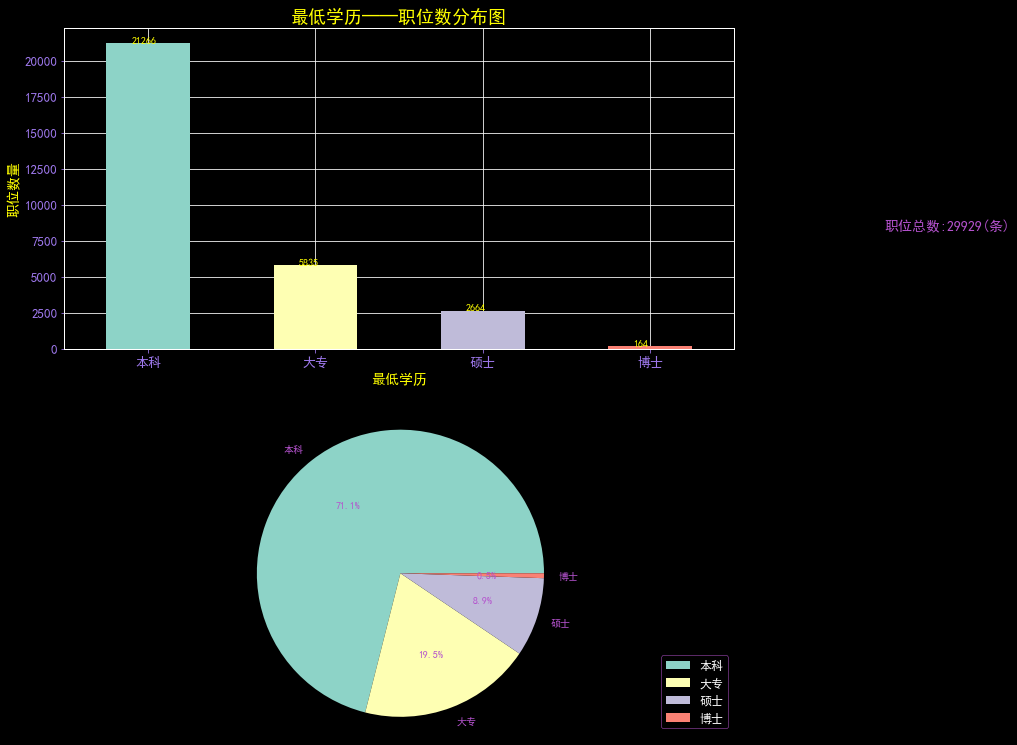

In [337]:
fig5 = plt.figure(5,figsize=(12,13))
ax5_1 = fig5.add_subplot(2,1,1) #可选facecolor='#4f4f4f',alpha=0.3
dfc_最低学历.plot(kind = 'bar',rot=0)   #color='#7fc8ff'
#设置标题、x轴和y轴标题、图例文字
title = plt.title(u'最低学历——职位数分布图',fontsize = 18,color = 'yellow')
xlabel = plt.xlabel(u'最低学历',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel(u'职位数量',fontsize = 14,color = 'yellow')
text1 = ax5_1.text(4.4,8200,u'职位总数:29929(条)',fontsize=14, color='#B452CD')
#设置坐标轴的的颜色和文字大小
plt.tick_params(colors='#9F79EE',labelsize=13)
#设置坐标值文字
list5 = dfc_最低学历.values
for i in range(len(list5)):
    ax5_1.text(i-0.1,list5[i],int(list5[i]),color='yellow')
ax5_2=fig5.add_subplot(2,1,2)
xl = dfc_最低学历.values
labels = list(dfc_最低学历.index)
explode = tuple([0.1,0,0,0,0,0])
plt.pie(xl,labels=labels,autopct='%1.1f%%',textprops={'color':'#B452CD'})
plt.axis('equal')
legend = ax5_2.legend(loc='lower right',shadow=True,fontsize=12,edgecolor='#B452CD')
plt.tick_params(colors='#9F79EE',labelsize=13)

In [318]:
#df.loc[df['df_最低学历']=='本科']&df.loc[df['df_最低学历']=='大专']&df.loc[df['df_最低学历']=='硕士']&df.loc[df['df_最低学历']=='博士']&df.loc[df['df_最低学历']=='中专']
dfe2=df.loc[df['education'].isin(['本科','大专','硕士','博士'])]

In [319]:
df['df_学历要求']=dfe2.education

In [320]:
df['df_学历要求'].value_counts()

本科    21266
大专     5835
硕士     2664
博士      164
Name: df_学历要求, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 2 columns):
学历要求    29929 non-null object
平均月薪    34162 non-null float64
dtypes: float64(1), object(1)
memory usage: 426.3+ KB


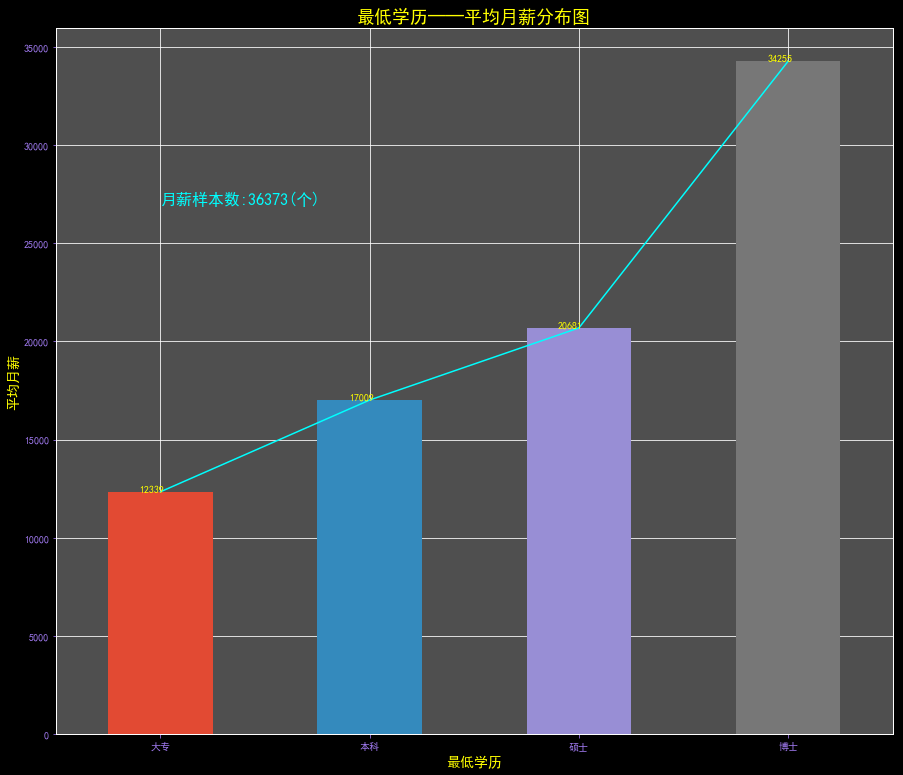

In [321]:
df6=pd.DataFrame(data={'学历要求':df['df_学历要求'],'平均月薪':df['df_平均月薪']})
df6.info()
grouped6 = df6['平均月薪'].groupby(df6['学历要求'])
#查看grouped6的信息
grouped6.mean()
grouped6.count()
grouped6.count().sum()
matplotlib.style.use('ggplot')
fig6 = plt.figure(6,facecolor = 'black',figsize=(15,13))
ax6 = fig6.add_subplot(1,1,1,facecolor='#4f4f4f',alpha=0.3)
grouped6.mean().round(1).sort_values().plot(color = 'cyan')#在条形图上叠加一个折线图
grouped6.mean().round(1).sort_values().plot(kind='bar',rot=0)
#设置标题、x轴、y轴的标签文本
title = plt.title(u'最低学历——平均月薪分布图',fontsize = 18,color = 'yellow')
xlabel= plt.xlabel(u'最低学历',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel(u'平均月薪',fontsize = 14,color = 'yellow')
#添加值标签(坐标值文字)
grouped61=grouped6.mean()
grouped61.dropna(axis=0, how='any', inplace=True)
list6 = grouped61.round(1).sort_values().values
for i in range(len(list6)):
    ax6.text(i-0.1,list6[i],int(list6[i]),color='yellow')
#设置图例注释
text= ax6.text(0,27000,u'月薪样本数:36373(个)',fontsize=16, color='cyan')
#设置轴刻度的文字颜色
plt.tick_params(colors='#9F79EE')

In [322]:
df7 = pd.DataFrame(data = {'平均月薪':df['df_平均月薪'],'学历要求':df['df_学历要求'],'工作经验':df['work_experience']})
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 3 columns):
平均月薪    34162 non-null float64
学历要求    29929 non-null object
工作经验    36373 non-null object
dtypes: float64(1), object(2)
memory usage: 568.4+ KB


In [323]:
df7

,平均月薪,学历要求,工作经验
0,9000.0,本科,3-4年经验
1,12500.0,大专,2年经验
2,7000.0,大专,无工作经验
3,31249.5,本科,3-4年经验
4,7000.0,本科,无工作经验
5,10000.0,本科,无工作经验
6,20000.0,本科,3-4年经验
7,7000.0,NaN,2年经验
8,3750.0,大专,无工作经验
9,20000.0,大专,3-4年经验


In [324]:
grouped7 = df7['平均月薪'].groupby([df7['学历要求'],df7['工作经验']])
#查看grouped7的信息
grouped7.mean().round(1)

学历要求  工作经验   
博士    10年以上经验    83333.0
      1年经验       50535.0
      2年经验       28590.8
      3-4年经验     44451.6
      5-7年经验     52132.1
      8-9年经验     22500.0
      无工作经验      22407.7
大专    10年以上经验    20625.0
      1年经验        9845.5
      2年经验       11436.6
      3-4年经验     13965.6
      5-7年经验     18513.0
      8-9年经验     25444.4
      无工作经验       8751.5
本科    10年以上经验    41137.0
      1年经验       12184.7
      2年经验       15042.4
      3-4年经验     17889.0
      5-7年经验     23508.3
      8-9年经验     30268.6
      无工作经验      13820.2
硕士    10年以上经验    35122.4
      1年经验       18459.7
      2年经验       20908.3
      3-4年经验     24907.0
      5-7年经验     33449.0
      8-9年经验     36756.3
      无工作经验      15504.2
Name: 平均月薪, dtype: float64

In [325]:
grouped7.count()
grouped7.count().sum()

28009

In [326]:
grouped7.mean().round(1)[:,'2年经验']

学历要求
博士    28590.8
大专    11436.6
本科    15042.4
硕士    20908.3
Name: 平均月薪, dtype: float64

In [328]:
xlist = list(grouped7.mean().round(1)[:,'2年经验'].sort_values().index)
grouped7.mean().round(1)[:,'2年经验'].reindex(xlist)

学历要求
大专    11436.6
本科    15042.4
硕士    20908.3
博士    28590.8
Name: 平均月薪, dtype: float64

In [329]:
xlist

['大专', '本科', '硕士', '博士']

In [330]:
ind = np.arange(6)
ind

array([0, 1, 2, 3, 4, 5])

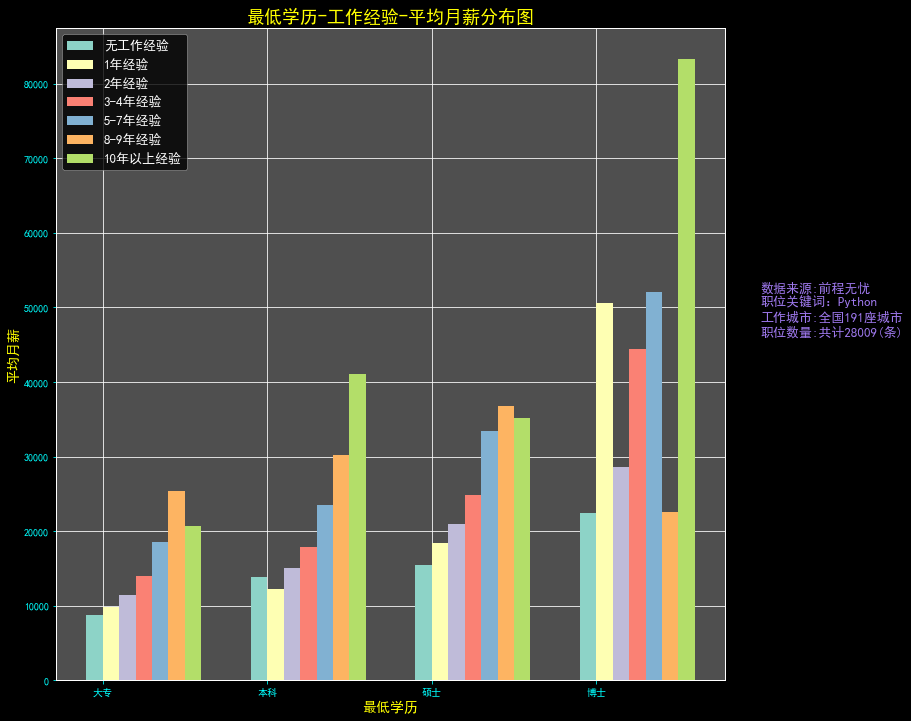

In [344]:
#开始画图，设置基本参数
matplotlib.style.use('dark_background')
fig7 = plt.figure(7,facecolor = 'black',figsize=(12,12))
ax7 = fig7.add_subplot(1,1,1,facecolor='#4f4f4f',alpha=0.3)
title = plt.title(u'最低学历-工作经验-平均月薪分布图',fontsize = 18,color = 'yellow')
xlabel = plt.xlabel(u'最低学历',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel(u'平均月薪',fontsize = 14,color = 'yellow')
plt.tick_params(colors='cyan')

#ylist1~7分别是7种条形图的Y值列表
ylist1 = grouped7.mean().round(1)[:,'无工作经验'].reindex(xlist).values
ylist2 = grouped7.mean().round(1)[:,'1年经验'].reindex(xlist).values
ylist3 = grouped7.mean().round(1)[:,'2年经验'].reindex(xlist).values
ylist4 = grouped7.mean().round(1)[:,'3-4年经验'].reindex(xlist).values
ylist5 = grouped7.mean().round(1)[:,'5-7年经验'].reindex(xlist).values
ylist6 = grouped7.mean().round(1)[:,'8-9年经验'].reindex(xlist).values
ylist7 = grouped7.mean().round(1)[:,'10年以上经验'].reindex(xlist).values

#img1~img7分别表示7种条形图
ind = np.arange(len(ylist1))#ind为x轴宽度，用numpy的array形式表示
width = 0.1#条形图的宽度，要合理设置否则太宽会摆不下
img1 = ax7.bar(ind,ylist1,width)
img2 = ax7.bar(ind+width,ylist2,width)
img3 = ax7.bar(ind+width*2,ylist3,width)
img4 = ax7.bar(ind+width*3,ylist4,width)
img5 = ax7.bar(ind+width*4,ylist5,width)
img6 = ax7.bar(ind+width*5,ylist6,width)
img7 = ax7.bar(ind+width*6,ylist7,width)


#设置X轴文本和位置调整
ax7.set_xticklabels(xlist)
ax7.set_xticks(ind + width / 2)
#设置文字说明
text1 = ax7.text(4.05,52100,u'数据来源:前程无忧',fontsize=13, color='#9F79EE')
text2 = ax7.text(4.05,50200,u'职位关键词：Python',fontsize=13, color='#9F79EE')
text3 = ax7.text(4.05,48200,u'工作城市:全国191座城市',fontsize=13, color='#9F79EE')
text4 = ax7.text(4.05,46200,u'职位数量:共计28009(条)',fontsize=13, color='#9F79EE')
#设置图例28009
ax7.legend((img1[0],img2[0],img3[0],img4[0],img5[0],img6[0],img7[0]), (u'无工作经验',u'1年经验',u'2年经验',u'3-4年经验',u'5-7年经验',u'8-9年经验',u'10年以上经验'),fontsize=13,facecolor='black')
#设置栅格
plt.grid(True)